# Oasis InfoByte : Data Science Tasks

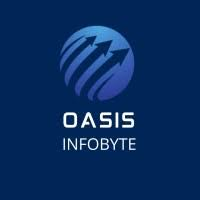

## Task 3 - CAR PRICE PREDICTION WITH MACHINE LEARNING

Target: From the Given Dataset, Model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables.

## Author : Mohamed Sherif El-Boraie

### Imported Libraries 

In [2]:
# Import the necessary libraries
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from statsmodels.stats.outliers_influence import variance_inflation_factor


from sklearn.model_selection import train_test_split , KFold , cross_val_score  ,GridSearchCV , RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler ,LabelEncoder,OneHotEncoder

from sklearn.linear_model import  LinearRegression , Lasso , Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_absolute_error , r2_score
import xgboost as xgb


# Import the matplotlib and seaborn libraries for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import plotly
import plotly.express as px


In [3]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings("ignore", category=RuntimeWarning, message="invalid value encountered in cast")


### Load and Explore Dataset

In [4]:
dataset = pd.read_csv('D:/Mohamed Sheriff/Projects/Git Projects/OIBSIP/Task 3 - CAR PRICE PREDICTION WITH MACHINE LEARNING/Dataset/Car Price.csv')
dataset.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible        rwd          front       88.6      168.8      64.1   
1  convertible        rwd          front       88.6      168.8      64.1   
2    hatchback        rwd          front       94.5      171.2      65.5   
3        sedan        fwd          front       99.8      176.6      66.2   
4        sedan        4wd          front       99.4      176.6      66.4   

   carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
0       48.8        2548       dohc           four         130       mpfi   
1       48.8        2548       dohc           four         130       mpfi   
2       52.4        2823       ohcv            six         152       mpfi   
3       54.3        2337        ohc           four         109       mpfi   
4       54.3        2824        ohc           five         136       mpfi   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   
2       2.68    3.47               9.0         154     5000       19   
3       3.19    3.40              10.0         102     5500       24   
4       3.19    3.40               8.0         115     5500       18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0

In [5]:
df = dataset.copy()
df.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible        rwd          front       88.6      168.8      64.1   
1  convertible        rwd          front       88.6      168.8      64.1   
2    hatchback        rwd          front       94.5      171.2      65.5   
3        sedan        fwd          front       99.8      176.6      66.2   
4        sedan        4wd          front       99.4      176.6      66.4   

   carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
0       48.8        2548       dohc           four         130       mpfi   
1       48.8        2548       dohc           four         130       mpfi   
2       52.4        2823       ohcv            six         152       mpfi   
3       54.3        2337        ohc           four         109       mpfi   
4       54.3        2824        ohc           five         136       mpfi   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   
2       2.68    3.47               9.0         154     5000       19   
3       3.19    3.40              10.0         102     5500       24   
4       3.19    3.40               8.0         115     5500       18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0

In [6]:
df =df.drop(['car_ID'],axis=1)

In [7]:
split_names = df['CarName'].str.split(' ', n=1, expand=True)
df['Car Brand'] = split_names[0]
df['Car Model'] = split_names[1]
df.drop('CarName', axis=1, inplace=True)


In [8]:
df['Car Brand'] = df['Car Brand'].str.capitalize()

In [9]:
df.rename(columns={'symboling': 'Symboling', 'fueltype': 'Fuel Type',
                   'aspiration': 'Aspiration Type', 'doornumber': 'Door Number',
                   'carbody': 'Car Body', 'drivewheel': 'Drive Wheel', 'enginelocation': 'Engine Location', 
                   'wheelbase': 'Wheel Base', 'carlength': 'Car Length', 'carwidth': 'Car Width', 
                   'carheight': 'Car Height', 'curbweight': 'Curb Weight', 'enginetype': 'Engine Type', 
                   'cylindernumber': 'Cylinder Number', 'enginesize': 'Engine Size', 'fuelsystem': 'Fuel System', 
                   'boreratio': 'Bore Ratio', 'stroke': 'Stroke', 'compressionratio': 'Compression Ratio', 
                   'horsepower': 'Horse Power', 'peakrpm': 'Peak RPM', 'citympg': 'City MPG', 
                   'highwaympg': 'Highway MPG', 'price': 'Price'}, inplace=True)

In [10]:
new_column_order = ['Car Brand', 'Car Model', 'Symboling', 'Fuel Type', 'Aspiration Type', 'Door Number', 'Car Body',
                    'Drive Wheel', 'Engine Location', 'Wheel Base', 'Car Length', 'Car Width', 'Car Height', 
                    'Curb Weight', 'Engine Type', 'Cylinder Number', 'Engine Size', 'Fuel System', 'Bore Ratio',
                    'Stroke', 'Compression Ratio', 'Horse Power', 'Peak RPM', 'City MPG', 'Highway MPG', 'Price']

# Reorder the columns
df = df[new_column_order]

In [11]:
df

Car Brand                  Car Model  Symboling Fuel Type  \
0    Alfa-romero                     giulia          3       gas   
1    Alfa-romero                    stelvio          3       gas   
2    Alfa-romero               Quadrifoglio          1       gas   
3           Audi                     100 ls          2       gas   
4           Audi                      100ls          2       gas   
5           Audi                        fox          2       gas   
6           Audi                      100ls          1       gas   
7           Audi                       5000          1       gas   
8           Audi                       4000          1       gas   
9           Audi             5000s (diesel)          0       gas   
10           Bmw                       320i          2       gas   
11           Bmw                       320i          0       gas   
12           Bmw                         x1          0       gas   
13           Bmw                         x3          0       gas   
14           Bmw                         z4          1       gas   
15           Bmw                         x4          0       gas   
16           Bmw                         x5          0       gas   
17           Bmw                         x3          0       gas   
18     Chevrolet                     impala          2       gas   
19     Chevrolet                monte carlo          1       gas   
20     Chevrolet                  vega 2300          0       gas   
21         Dodge                    rampage          1       gas   
22         Dodge              challenger se          1       gas   
23         Dodge                       d200          1       gas   
24         Dodge                monaco (sw)          1       gas   
25         Dodge               colt hardtop          1       gas   
26         Dodge                  colt (sw)          1       gas   
27         Dodge             coronet custom          1       gas   
28         Dodge                dart custom         -1       gas   
29         Dodge        coronet custom (sw)          3       gas   
30         Honda                      civic          2       gas   
31         Honda                 civic cvcc          2       gas   
32         Honda                      civic          1       gas   
33         Honda                accord cvcc          1       gas   
34         Honda                 civic cvcc          1       gas   
35         Honda                  accord lx          0       gas   
36         Honda              civic 1500 gl          0       gas   
37         Honda                     accord          0       gas   
38         Honda                 civic 1300          0       gas   
39         Honda                    prelude          0       gas   
40         Honda                     accord          0       gas   
41         Honda                      civic          0       gas   
42         Honda               civic (auto)          1       gas   
43         Isuzu                       MU-X          0       gas   
44         Isuzu                     D-Max           1       gas   
45         Isuzu              D-Max V-Cross          0       gas   
46         Isuzu                     D-Max           2       gas   
47        Jaguar                         xj          0       gas   
48        Jaguar                         xf          0       gas   
49        Jaguar                         xk          0       gas   
50         Maxda                        rx3          1       gas   
51         Maxda                 glc deluxe          1       gas   
52         Mazda                  rx2 coupe          1       gas   
53         Mazda                       rx-4          1       gas   
54         Mazda                 glc deluxe          1       gas   
55         Mazda                        626          3       gas   
56         Mazda                        glc          3       gas   
57         Mazda                    rx-7 gs          3       ga

Dataset Features >>>
- Car Brand: The brand or manufacturer of the car.
- Car Model: The specific model name of the car.
- Symboling: Insurance risk rating of the car (ordinal categorical variable indicating risk level).
    - The "Symboling" values typically range from -3 to +3, where:
        - Negative values (e.g., -3, -2, -1) indicate lower risk or safer cars.
        - Positive values (e.g., +1, +2, +3) indicate higher risk or less safe cars.
- Fuel Type: Type of fuel used by the car (e.g., gas, diesel).
- Aspiration Type: Type of aspiration system (e.g., std, turbo).
- Door Number: Number of doors in the car (e.g., two, four).
- Car Body: Body style of the car (e.g., convertible, sedan).
- Drive Wheel: Type of drive wheels (e.g., rwd, fwd).
- Engine Location: Location of the car's engine (e.g., front, rear).
- Wheel Base: Wheelbase of the car.
- Car Length: Length of the car.
- Car Width: Width of the car.
- Car Height: Height of the car.
- Curb Weight: Curb weight of the car.
- Engine Type: Type of engine (e.g., dohc, ohcv).
- Cylinder Number: Number of cylinders in the engine.
- Engine Size: Size of the car's engine.
- Fuel System: Type of fuel delivery system (e.g., mpfi, 2bbl).
- Bore Ratio: Bore ratio of the engine.
- Stroke: Stroke length of the engine.
- Compression Ratio: Compression ratio of the engine.
- Horse Power: Horsepower of the engine.
- Peak RPM: Engine's peak revolutions per minute.
- City MPG: Miles per gallon (MPG) in city driving conditions.
- Highway MPG: Miles per gallon (MPG) in highway driving conditions.
- Price: Price of the car.

In [12]:
df['Car Brand'].value_counts()

Car Brand
Toyota         31
Nissan         18
Mazda          15
Honda          13
Mitsubishi     13
Subaru         12
Peugeot        11
Volvo          11
Dodge           9
Volkswagen      9
Bmw             8
Buick           8
Audi            7
Plymouth        7
Saab            6
Isuzu           4
Porsche         4
Alfa-romero     3
Jaguar          3
Chevrolet       3
Vw              2
Maxda           2
Renault         2
Toyouta         1
Vokswagen       1
Mercury         1
Porcshce        1
Name: count, dtype: int64

We notice that there are some car brands misspelled !

In [13]:
df['Car Brand'].replace({'maxda': 'Mazda','Maxda': 'Mazda', 'nissan': 'Nissan', 'porcshce': 'Porsche',
                         'Porcshce': 'Porsche', 'toyouta': 'Toyota', 'Toyouta': 'Toyota','vokswagen': 'Volkswagen',
                         'vw': 'Volkswagen', 'Vw': 'Volkswagen', 'Vokswagen': 'Volkswagen' }, inplace=True)
df

Car Brand                  Car Model  Symboling Fuel Type  \
0    Alfa-romero                     giulia          3       gas   
1    Alfa-romero                    stelvio          3       gas   
2    Alfa-romero               Quadrifoglio          1       gas   
3           Audi                     100 ls          2       gas   
4           Audi                      100ls          2       gas   
5           Audi                        fox          2       gas   
6           Audi                      100ls          1       gas   
7           Audi                       5000          1       gas   
8           Audi                       4000          1       gas   
9           Audi             5000s (diesel)          0       gas   
10           Bmw                       320i          2       gas   
11           Bmw                       320i          0       gas   
12           Bmw                         x1          0       gas   
13           Bmw                         x3          0       gas   
14           Bmw                         z4          1       gas   
15           Bmw                         x4          0       gas   
16           Bmw                         x5          0       gas   
17           Bmw                         x3          0       gas   
18     Chevrolet                     impala          2       gas   
19     Chevrolet                monte carlo          1       gas   
20     Chevrolet                  vega 2300          0       gas   
21         Dodge                    rampage          1       gas   
22         Dodge              challenger se          1       gas   
23         Dodge                       d200          1       gas   
24         Dodge                monaco (sw)          1       gas   
25         Dodge               colt hardtop          1       gas   
26         Dodge                  colt (sw)          1       gas   
27         Dodge             coronet custom          1       gas   
28         Dodge                dart custom         -1       gas   
29         Dodge        coronet custom (sw)          3       gas   
30         Honda                      civic          2       gas   
31         Honda                 civic cvcc          2       gas   
32         Honda                      civic          1       gas   
33         Honda                accord cvcc          1       gas   
34         Honda                 civic cvcc          1       gas   
35         Honda                  accord lx          0       gas   
36         Honda              civic 1500 gl          0       gas   
37         Honda                     accord          0       gas   
38         Honda                 civic 1300          0       gas   
39         Honda                    prelude          0       gas   
40         Honda                     accord          0       gas   
41         Honda                      civic          0       gas   
42         Honda               civic (auto)          1       gas   
43         Isuzu                       MU-X          0       gas   
44         Isuzu                     D-Max           1       gas   
45         Isuzu              D-Max V-Cross          0       gas   
46         Isuzu                     D-Max           2       gas   
47        Jaguar                         xj          0       gas   
48        Jaguar                         xf          0       gas   
49        Jaguar                         xk          0       gas   
50         Mazda                        rx3          1       gas   
51         Mazda                 glc deluxe          1       gas   
52         Mazda                  rx2 coupe          1       gas   
53         Mazda                       rx-4          1       gas   
54         Mazda                 glc deluxe          1       gas   
55         Mazda                        626          3       gas   
56         Mazda                        glc          3       gas   
57         Mazda                    rx-7 gs          3       ga

In [14]:
df['Car Model'].value_counts()

Car Model
corolla                      6
corona                       6
504                          6
dl                           4
civic                        3
mirage g4                    3
mark ii                      3
g4                           3
rabbit                       3
outlander                    3
dasher                       3
glc deluxe                   3
626                          3
D-Max                        2
cayenne                      2
rx-4                         2
corolla 1200                 2
accord                       2
glc                          2
rx-7 gs                      2
99gle                        2
99le                         2
civic cvcc                   2
corolla liftback             2
rogue                        2
99e                          2
320i                         2
145e (sw)                    2
144ea                        2
244dl                        2
x3                           2
clipper                      

In [15]:
df.isnull().sum()

Car Brand            0
Car Model            2
Symboling            0
Fuel Type            0
Aspiration Type      0
Door Number          0
Car Body             0
Drive Wheel          0
Engine Location      0
Wheel Base           0
Car Length           0
Car Width            0
Car Height           0
Curb Weight          0
Engine Type          0
Cylinder Number      0
Engine Size          0
Fuel System          0
Bore Ratio           0
Stroke               0
Compression Ratio    0
Horse Power          0
Peak RPM             0
City MPG             0
Highway MPG          0
Price                0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Car Brand          205 non-null    object 
 1   Car Model          203 non-null    object 
 2   Symboling          205 non-null    int64  
 3   Fuel Type          205 non-null    object 
 4   Aspiration Type    205 non-null    object 
 5   Door Number        205 non-null    object 
 6   Car Body           205 non-null    object 
 7   Drive Wheel        205 non-null    object 
 8   Engine Location    205 non-null    object 
 9   Wheel Base         205 non-null    float64
 10  Car Length         205 non-null    float64
 11  Car Width          205 non-null    float64
 12  Car Height         205 non-null    float64
 13  Curb Weight        205 non-null    int64  
 14  Engine Type        205 non-null    object 
 15  Cylinder Number    205 non-null    object 
 16  Engine Size        205 non

In [17]:
df.describe(include='all')

Car Brand Car Model   Symboling Fuel Type Aspiration Type Door Number  \
count        205       203  205.000000       205             205         205   
unique        22       141         NaN         2               2           2   
top       Toyota   corolla         NaN       gas             std        four   
freq          32         6         NaN       185             168         115   
mean         NaN       NaN    0.834146       NaN             NaN         NaN   
std          NaN       NaN    1.245307       NaN             NaN         NaN   
min          NaN       NaN   -2.000000       NaN             NaN         NaN   
25%          NaN       NaN    0.000000       NaN             NaN         NaN   
50%          NaN       NaN    1.000000       NaN             NaN         NaN   
75%          NaN       NaN    2.000000       NaN             NaN         NaN   
max          NaN       NaN    3.000000       NaN             NaN         NaN   

       Car Body Drive Wheel Engine Location  Wheel Base  Car Length  \
count       205         205             205  205.000000  205.000000   
unique        5           3               2         NaN         NaN   
top       sedan         fwd           front         NaN         NaN   
freq         96         120             202         NaN         NaN   
mean        NaN         NaN             NaN   98.756585  174.049268   
std         NaN         NaN             NaN    6.021776   12.337289   
min         NaN         NaN             NaN   86.600000  141.100000   
25%         NaN         NaN             NaN   94.500000  166.300000   
50%         NaN         NaN             NaN   97.000000  173.200000   
75%         NaN         NaN             NaN  102.400000  183.100000   
max         NaN         NaN             NaN  120.900000  208.100000   

         Car Width  Car Height  Curb Weight Engine Type Cylinder Number  \
count   205.000000  205.000000   205.000000         205             205   
unique         NaN         NaN          NaN           7               7   
top            NaN         NaN          NaN         ohc            four   
freq           NaN         NaN          NaN         148             159   
mean     65.907805   53.724878  2555.565854         NaN             NaN   
std       2.145204    2.443522   520.680204         NaN             NaN   
min      60.300000   47.800000  1488.000000         NaN             NaN   
25%      64.100000   52.000000  2145.000000         NaN             NaN   
50%      65.500000   54.100000  2414.000000         NaN             NaN   
75%      66.900000   55.500000  2935.000000         NaN             NaN   
max      72.300000   59.800000  4066.000000         NaN             NaN   

        Engine Size Fuel System  Bore Ratio      Stroke  Compression Ratio  \
count    205.000000         205  205.000000  205.000000         205.000000   
unique          NaN           8         NaN         NaN                NaN   
top             NaN        mpfi         NaN         NaN                NaN   
freq            NaN          94         NaN         NaN                NaN   
mean     126.907317         NaN    3.329756    3.255415          10.142537   
std       41.642693         NaN    0.270844    0.313597           3.972040   
min       61.000000         NaN    2.540000    2.070000           7.000000   
25%       97.000000         NaN    3.150000    3.110000           8.600000   
50%      120.000000         NaN    3.310000    3.290000           9.000000   
75%      141.000000         NaN    3.580000    3.410000           9.400000   
max      326.000000         NaN    3.940000    4.170000          23.000000   

        Horse Power     Peak RPM    City MPG  Highway MPG         Price  
count    205.000000   205.000000  205.000000   205.000000    205.000000  
unique          NaN          NaN         NaN          NaN           NaN  
top             NaN          NaN         NaN          NaN           NaN  
freq            NaN          NaN         NaN          NaN  

### Explantory Data Analysis - EDA

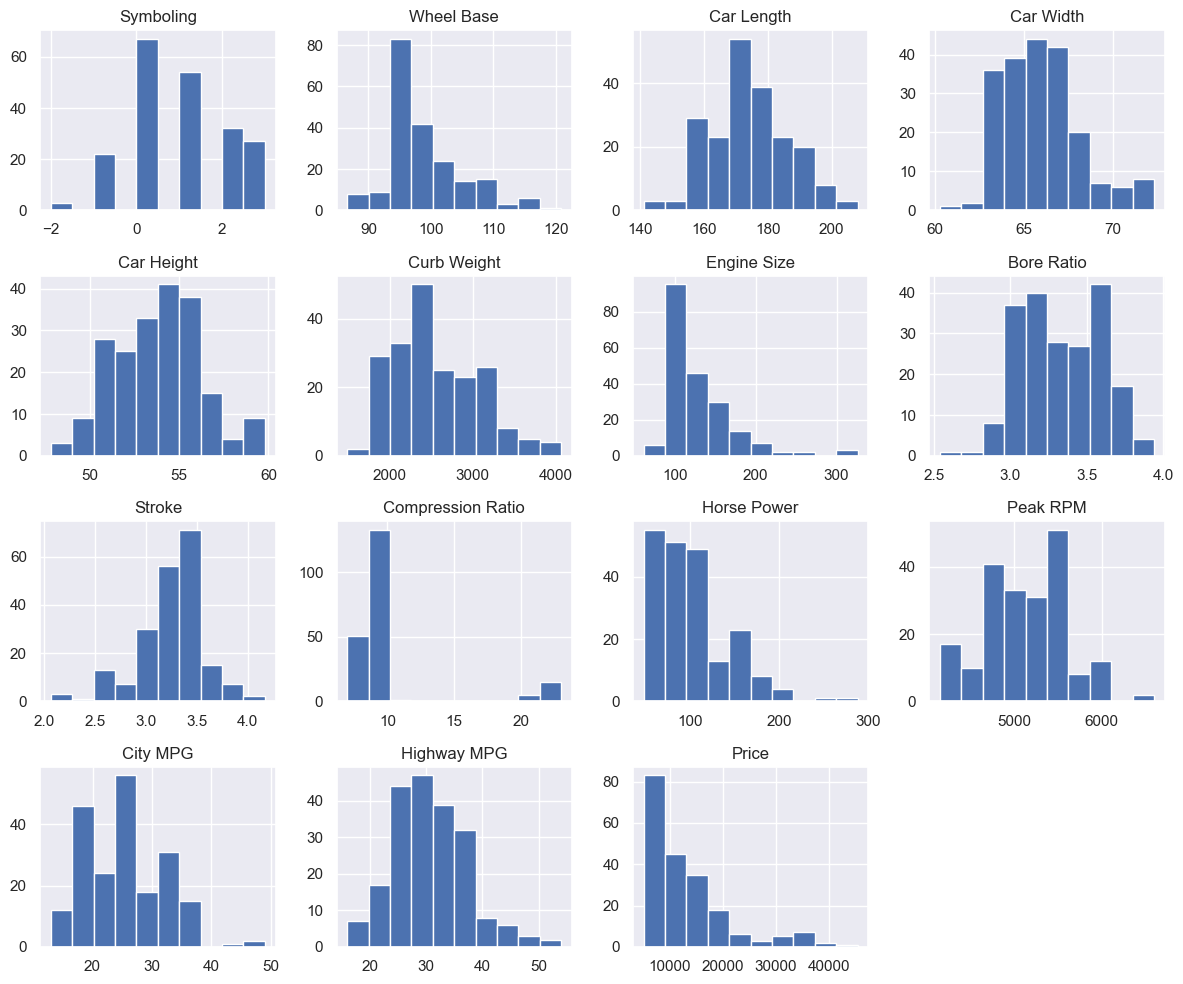

In [18]:
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

In [19]:
fig = px.box(df,x='Car Brand',y='Price',color='Car Brand',title='Car Brand Range Prices')
fig.show()

In [20]:
# List of columns for box plots
columns_for_boxplot = df[['Symboling','Wheel Base', 'Car Length', 'Car Width',
                       'Car Height', 'Curb Weight', 'Engine Size', 'Bore Ratio',
                       'Stroke', 'Compression Ratio', 'Horse Power', 'Peak RPM', 'City MPG', 'Highway MPG']]

# Create a DataFrame for the box plot data
boxplot_data = []
for column in columns_for_boxplot:
    boxplot_data.extend([{'Column': column, 'Value': value} for value in df[column]])

# Create animated box plots
fig = px.box(boxplot_data, x='Column', y='Value', animation_frame='Column',
             title='Animated Box Plots for Selected Columns')
fig.update_layout(yaxis_title='Value')
fig.show()
########################################################################################################################
########################################################################################################################
## NOTE : 
##### Press the 'Rescale' button - at the top right - for each animation frame to adjust y-axis scale to show th BoxPlot 
########################################################################################################################
########################################################################################################################

In [238]:
numerical_cols=df.select_dtypes(exclude=['object']).columns

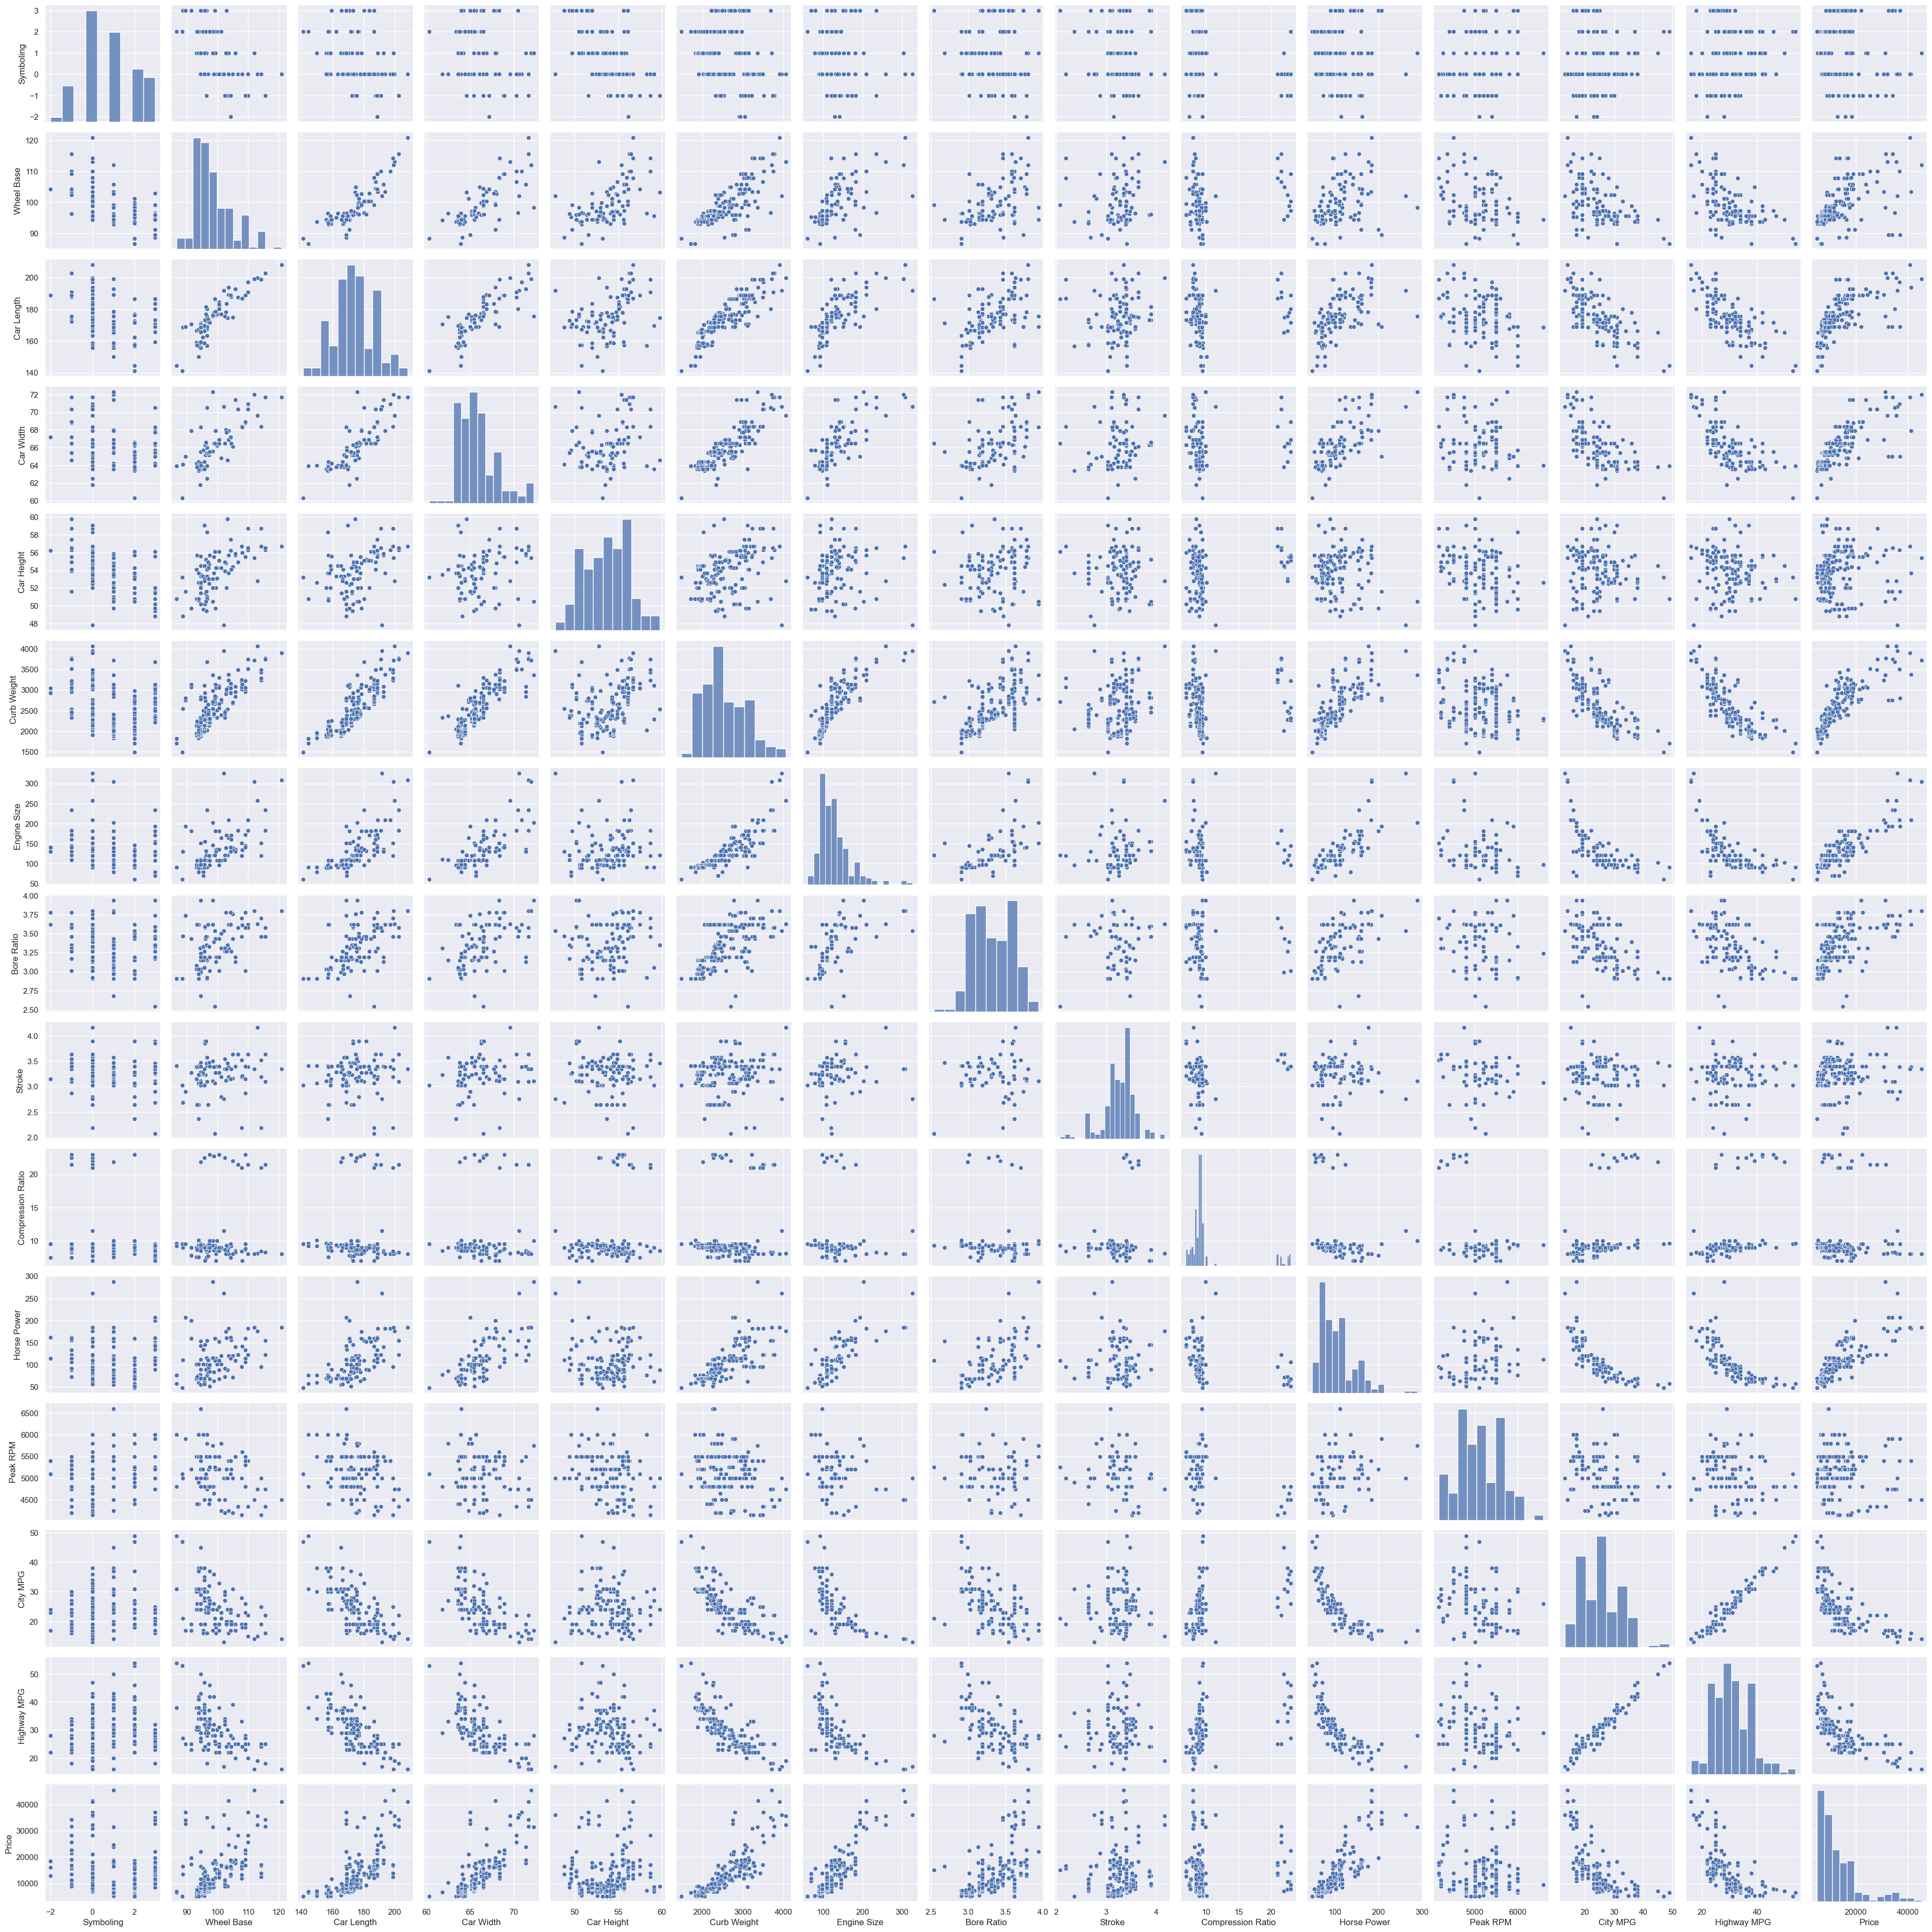

In [239]:
sns.pairplot(df[numerical_cols])

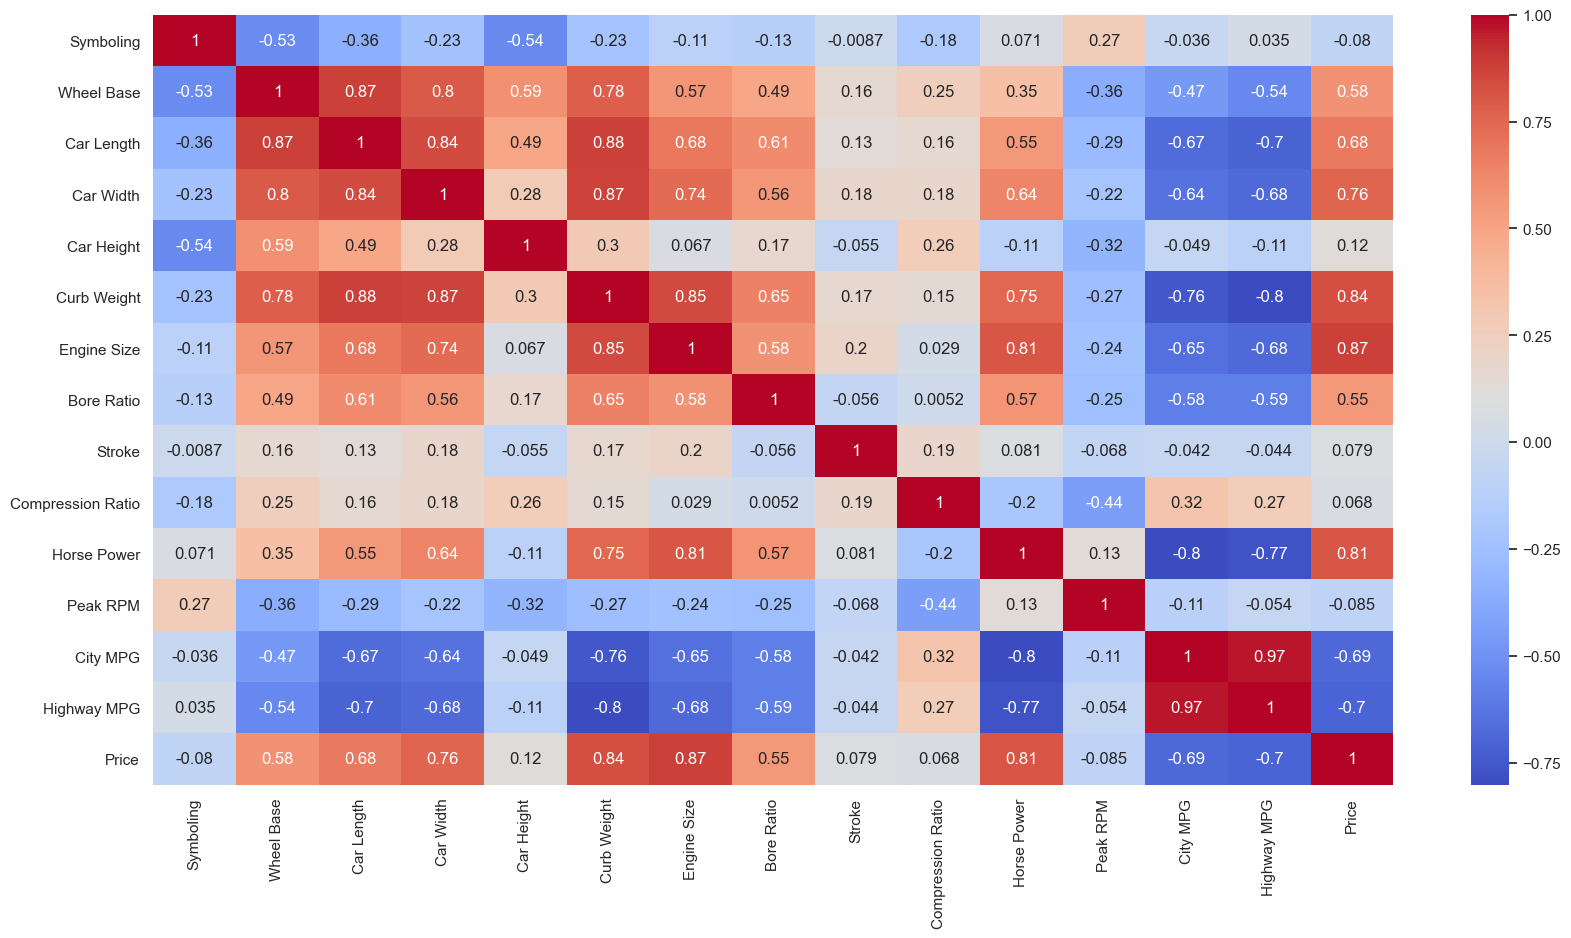

In [241]:
# Visualize the correlation between features
plt.figure(figsize=(20, 10))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.show()

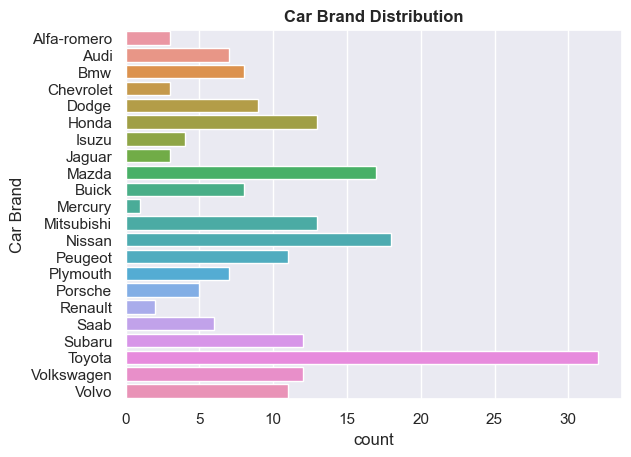

In [167]:
sns.countplot(y='Car Brand',data=df)
plt.title("Car Brand Distribution", fontweight='bold')
plt.show()

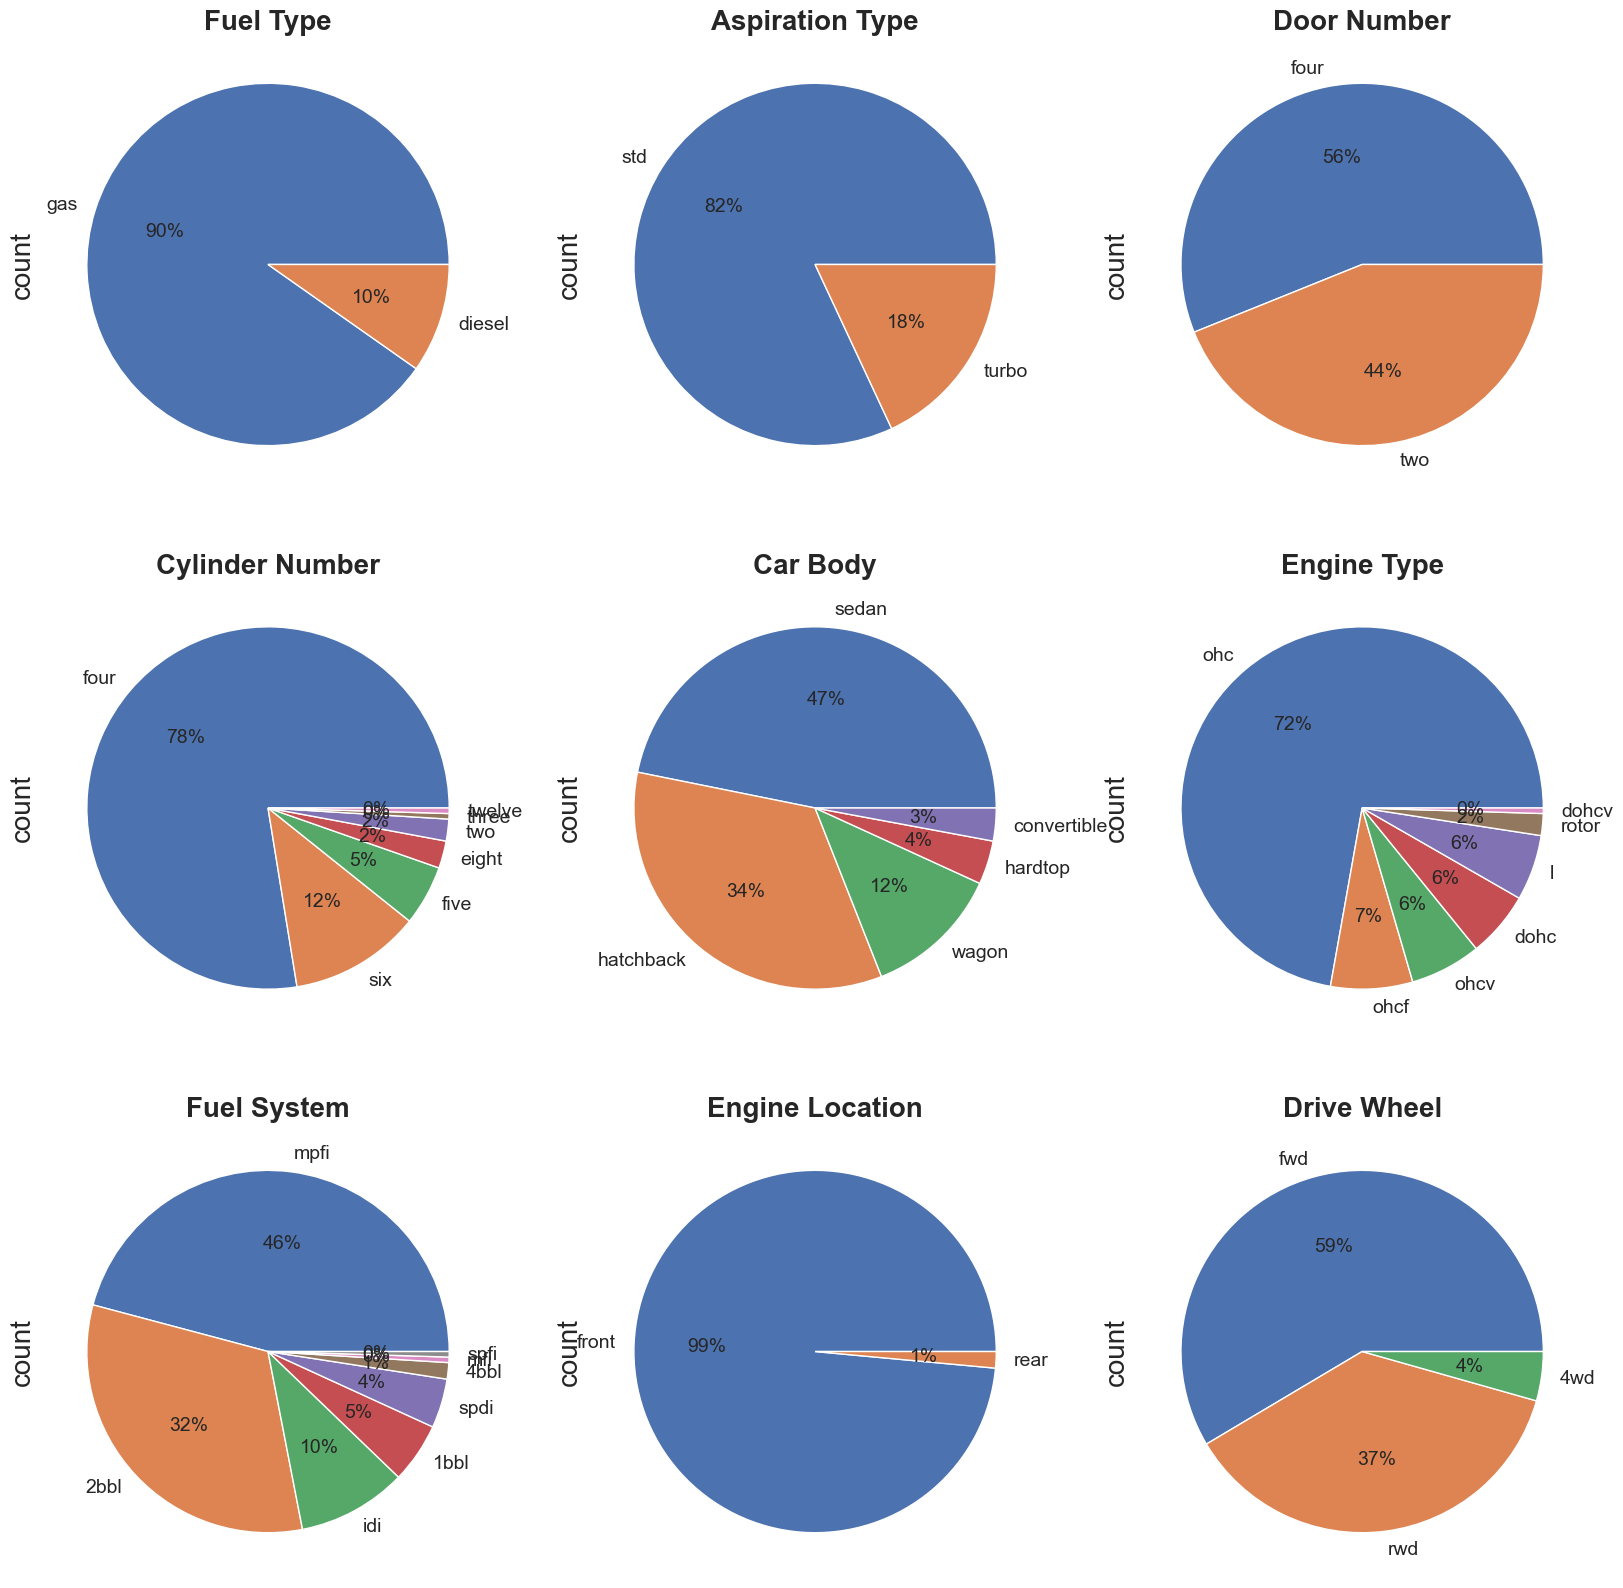

In [187]:
cols_list= df[['Fuel Type', 'Aspiration Type', 'Door Number', 'Cylinder Number', 
              'Car Body', 'Engine Type', 'Fuel System', 'Engine Location', 'Drive Wheel']]

fig, axes = plt.subplots(3,3)
for ax, col in zip(axes.ravel(), cols_list):
    df[col].value_counts().plot(ax=ax, kind='pie', figsize=(20, 20), fontsize=14, autopct='%1.0f%%')
    ax.set_title(str(col), fontsize = 20)
    ax.title.set_fontweight("bold")  # Set title font weight to bold
    ax.yaxis.label.set_size(20)

plt.show()

- Majority of car body are sedan and hatchback
- Majority of cars have fwd drive wheel
- Minority number of cars having rear engine
- Majority number of engine type are of 'ohc'
- Most Cars have four cylinder number

Text(0.5, 1.0, 'Distrubtion of Diesel Vechicles Prices')

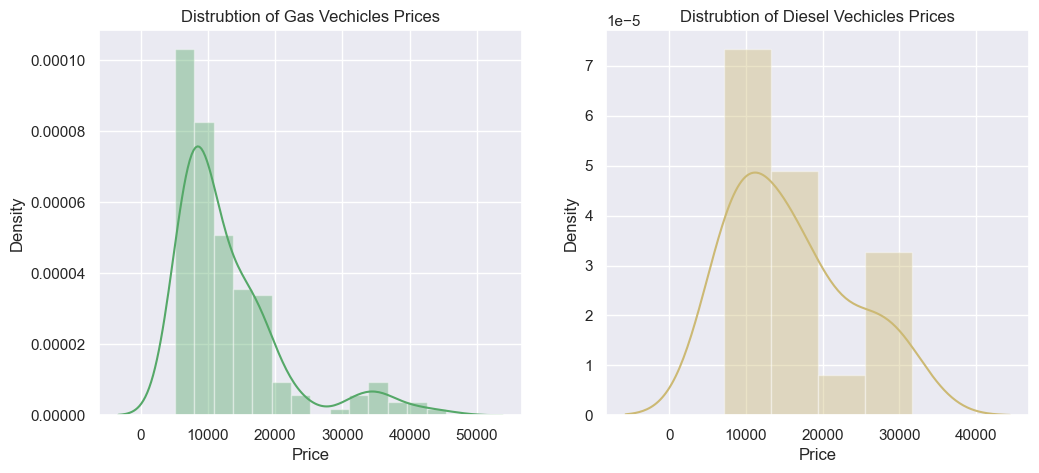

In [202]:
f= plt.figure(figsize=(12,5))

ax = f.add_subplot(1,2,1)
sns.distplot(df[df['Fuel Type']=='gas']['Price'],color='g',ax=ax)
ax.set_title('Distrubtion of Gas Vechicles Prices')

ax = f.add_subplot(1,2,2)
sns.distplot(df[df['Fuel Type']=='diesel']['Price'],color='y',ax=ax)
ax.set_title('Distrubtion of Diesel Vechicles Prices')

<Axes: xlabel='Fuel Type', ylabel='Price'>

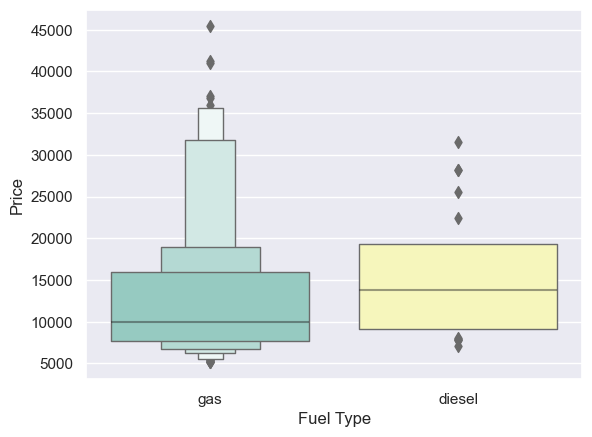

In [226]:
sns.boxenplot(data=df,x="Fuel Type", y="Price", palette='Set3')

- Price of diesel is much higher than of gas , also there are some outliers in gas vehicles


Text(0.5, 1.0, 'Distrubtion of Turbo Aspiration Vechicles')

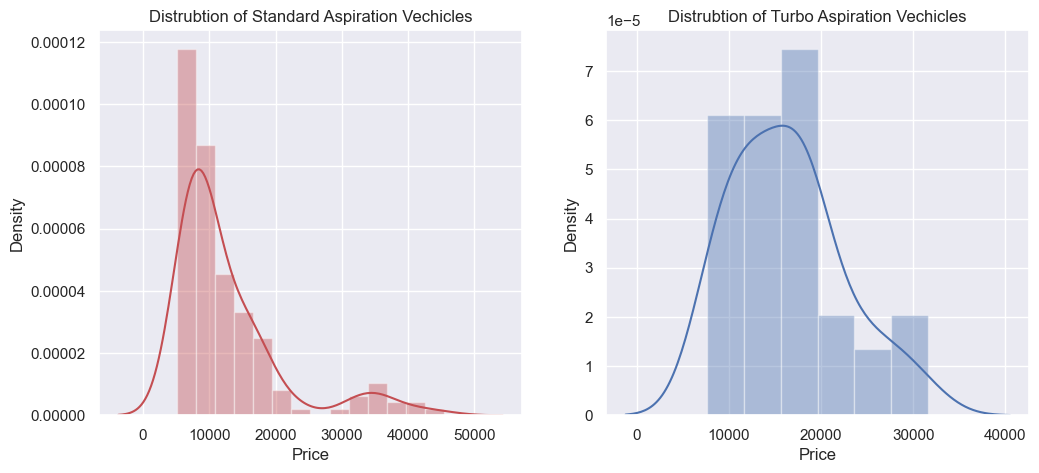

In [261]:
f= plt.figure(figsize=(12,5))

ax = f.add_subplot(1,2,1)
sns.distplot(df[df['Aspiration Type']=='std']['Price'],color='r',ax=ax)
ax.set_title('Distrubtion of Standard Aspiration Vechicles')

ax = f.add_subplot(1,2,2)
sns.distplot(df[df['Aspiration Type']=='turbo']['Price'],color='b',ax=ax)
ax.set_title('Distrubtion of Turbo Aspiration Vechicles')

<Axes: xlabel='Aspiration Type', ylabel='Price'>

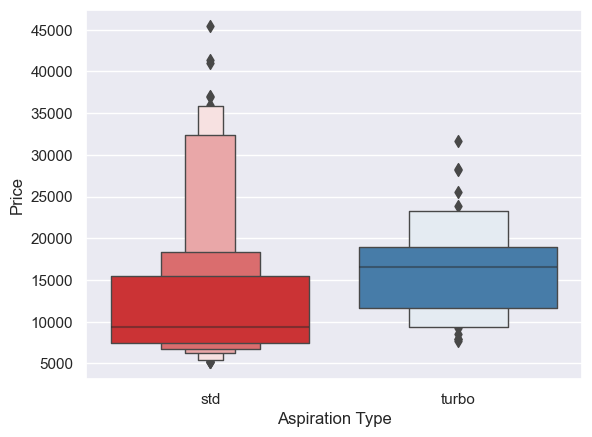

In [223]:
sns.boxenplot(data=df,x="Aspiration Type", y="Price", palette='Set1')

- Price of turbo is higher in compared to std , although there are some outliers in std price


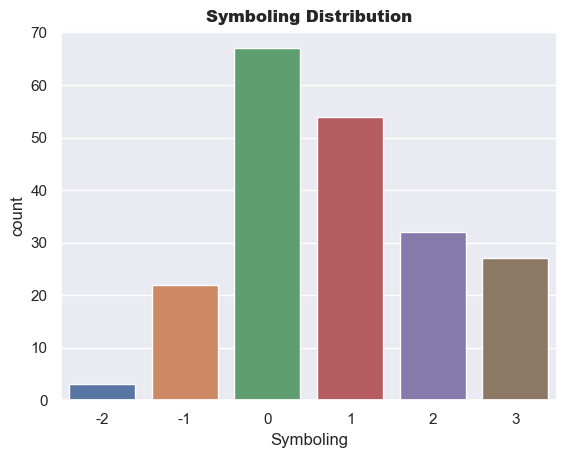

In [258]:
sns.countplot(x='Symboling',data=df)
plt.title("Symboling Distribution", fontweight="black")
plt.show()

- Most of the car symboling has 0 value


<Axes: xlabel='Symboling', ylabel='Price'>

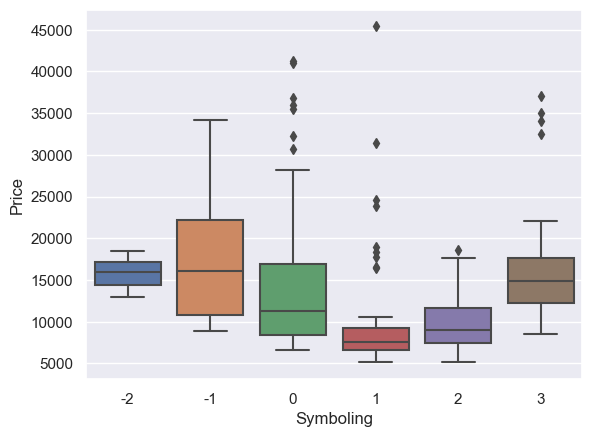

In [237]:
sns.boxplot(x = 'Symboling', y = 'Price', data = df)

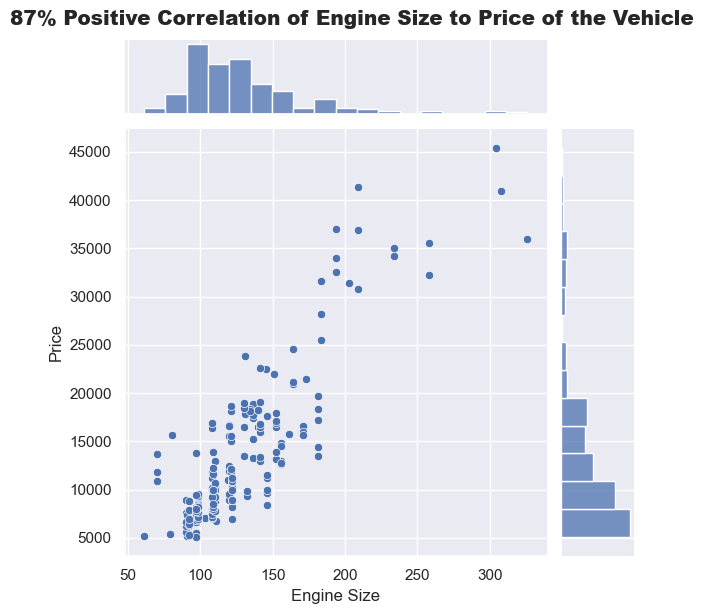

In [271]:
joint_plot = sns.jointplot(x="Engine Size", y="Price", data=df)

joint_plot.fig.suptitle('87% Positive Correlation of Engine Size to Price of the Vehicle', y=1.02, fontweight="black")

plt.show()

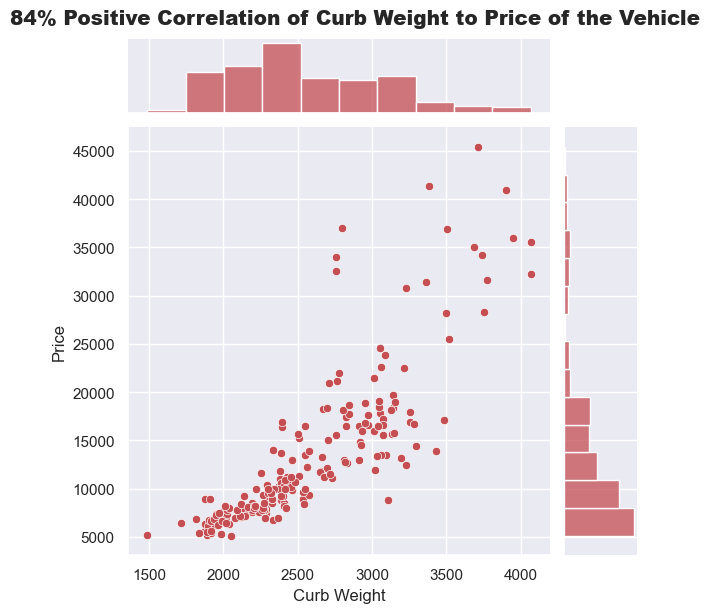

In [272]:
joint_plot = sns.jointplot(x="Curb Weight", y="Price", data=df, color='r')

joint_plot.fig.suptitle('84% Positive Correlation of Curb Weight to Price of the Vehicle', y=1.02, fontweight="black")

plt.show()

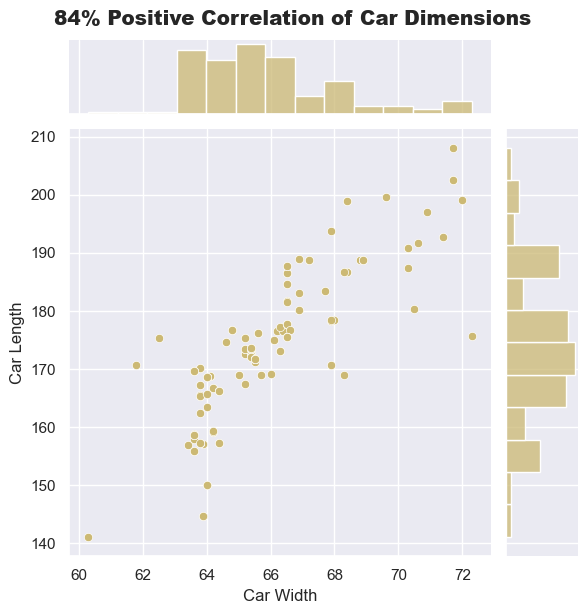

In [273]:
joint_plot = sns.jointplot(x="Car Width", y="Car Length", data=df, color='y')

joint_plot.fig.suptitle('84% Positive Correlation of Car Dimensions ', y=1.02, fontweight="black")

plt.show()

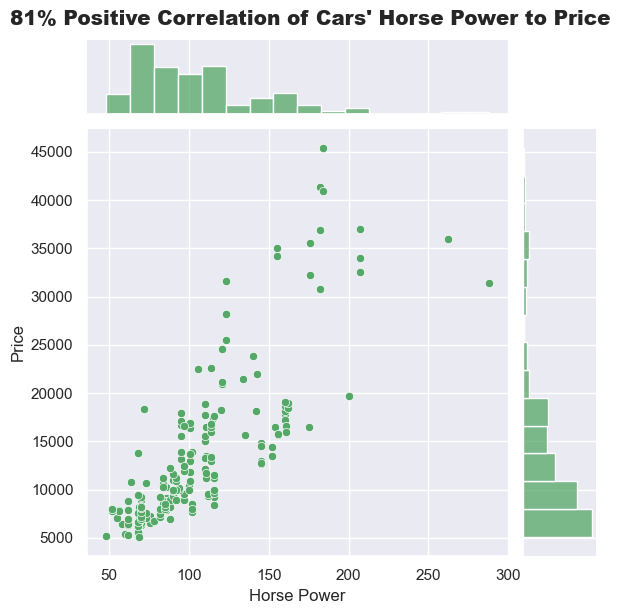

In [274]:
joint_plot = sns.jointplot(x="Horse Power", y="Price", data=df, color='g')

joint_plot.fig.suptitle('81% Positive Correlation of Cars\' Horse Power to Price ', y=1.02, fontweight="black")

plt.show()

- We do not need 'Car Model' column , our concern about the Brand Name only; so we are going to drop the column to implement the next phase

In [275]:
df.drop('Car Model', axis=1, inplace=True)

In [277]:
df.head()

Car Brand  Symboling Fuel Type Aspiration Type Door Number     Car Body  \
0  Alfa-romero          3       gas             std         two  convertible   
1  Alfa-romero          3       gas             std         two  convertible   
2  Alfa-romero          1       gas             std         two    hatchback   
3         Audi          2       gas             std        four        sedan   
4         Audi          2       gas             std        four        sedan   

  Drive Wheel Engine Location  Wheel Base  Car Length  Car Width  Car Height  \
0         rwd           front        88.6       168.8       64.1        48.8   
1         rwd           front        88.6       168.8       64.1        48.8   
2         rwd           front        94.5       171.2       65.5        52.4   
3         fwd           front        99.8       176.6       66.2        54.3   
4         4wd           front        99.4       176.6       66.4        54.3   

   Curb Weight Engine Type Cylinder Number  Engine Size Fuel System  \
0         2548        dohc            four          130        mpfi   
1         2548        dohc            four          130        mpfi   
2         2823        ohcv             six          152        mpfi   
3         2337         ohc            four          109        mpfi   
4         2824         ohc            five          136        mpfi   

   Bore Ratio  Stroke  Compression Ratio  Horse Power  Peak RPM  City MPG  \
0        3.47    2.68                9.0          111      5000        21   
1        3.47    2.68                9.0          111      5000        21   
2        2.68    3.47                9.0          154      5000        19   
3        3.19    3.40               10.0          102      5500        24   
4        3.19    3.40                8.0          115      5500        18   

   Highway MPG    Price  
0           27  13495.0  
1           27  16500.0  
2           26  16500.0  
3           30  13950.0  
4           22  17450.0

### Data Enconding 

In [278]:
df['Door Number'].replace({'two':2, 'four':4}, inplace=True)
df['Cylinder Number'].replace({'two':2, 'three':3, 'four':4, 'five':5, 'six':6, 'eight':8, 'twelve':12}, inplace=True)

In [279]:
df = pd.get_dummies(df, columns = ['Car Brand', 'Fuel Type', 'Aspiration Type', 'Car Body', 'Drive Wheel', 'Engine Location', 'Engine Type', 'Fuel System'])

In [281]:
df = df.astype(int)

In [282]:
df.head()

Symboling  Door Number  Wheel Base  Car Length  Car Width  Car Height  \
0          3            2          88         168         64          48   
1          3            2          88         168         64          48   
2          1            2          94         171         65          52   
3          2            4          99         176         66          54   
4          2            4          99         176         66          54   

   Curb Weight  Cylinder Number  Engine Size  Bore Ratio  Stroke  \
0         2548                4          130           3       2   
1         2548                4          130           3       2   
2         2823                6          152           2       3   
3         2337                4          109           3       3   
4         2824                5          136           3       3   

   Compression Ratio  Horse Power  Peak RPM  City MPG  Highway MPG  Price  \
0                  9          111      5000        21           27  13495   
1                  9          111      5000        21           27  16500   
2                  9          154      5000        19           26  16500   
3                 10          102      5500        24           30  13950   
4                  8          115      5500        18           22  17450   

   Car Brand_Alfa-romero  Car Brand_Audi  Car Brand_Bmw  Car Brand_Buick  \
0                      1               0              0                0   
1                      1               0              0                0   
2                      1               0              0                0   
3                      0               1              0                0   
4                      0               1              0                0   

   Car Brand_Chevrolet  Car Brand_Dodge  Car Brand_Honda  Car Brand_Isuzu  \
0                    0                0                0                0   
1                    0                0                0                0   
2                    0                0                0                0   
3                    0                0                0                0   
4                    0                0                0                0   

   Car Brand_Jaguar  Car Brand_Mazda  Car Brand_Mercury  Car Brand_Mitsubishi  \
0                 0                0                  0                     0   
1                 0                0                  0                     0   
2                 0                0                  0                     0   
3                 0                0                  0                     0   
4                 0                0                  0                     0   

   Car Brand_Nissan  Car Brand_Peugeot  Car Brand_Plymouth  Car Brand_Porsche  \
0                 0                  0                   0                  0   
1                 0                  0                   0                  0   
2                 0                  0                   0                  0   
3                 0                  0                   0                  0   
4                 0                  0                   0                  0   

   Car Brand_Renault  Car Brand_Saab  Car Brand_Subaru  Car Brand_Toyota  \
0                  0               0                 0                 0   
1                  0               0                 0                 0   
2                  0               0                 0                 0   
3                  0               0                 0                 0   
4                  0               0                 0                 0   

   Car Brand_Volkswagen  Car Brand_Volvo  Fuel Type_diesel  Fuel Type_gas  \
0                     0                0                 0              1   
1                     0                0                 0              1   
2                     0                0                 0              1   
3              

### Dealing with Outliers

- Note !!!
    - The outliers in the dataset are actually exotic cars for special tasks with high performance so we will not be discarding them

### Check Multicollienraity using VIF method

Multicollinearity occurs when there are two or more independent variables in a multiple regression model, which have a high correlation among themselves.
We will calculate Variance Inflation Factor(VIF)

In [288]:
vif_df = df[[col for col in df.columns if col != 'Price']]

vif_data = pd.DataFrame()
vif_data["Feature"] = vif_df.columns
vif_data["VIF"] = [variance_inflation_factor(vif_df.values ,i) for i in range(len(vif_df.columns))]
vif_data.head(16)

Feature         VIF
0           Symboling    6.241960
1         Door Number    3.856129
2          Wheel Base   19.032650
3          Car Length   24.188764
4           Car Width   15.289008
5          Car Height    7.602104
6         Curb Weight   42.458669
7     Cylinder Number   15.002539
8         Engine Size   42.118324
9          Bore Ratio    3.589466
10             Stroke    3.970186
11  Compression Ratio  111.604269
12        Horse Power   45.762038
13           Peak RPM    5.903731
14           City MPG   54.454740
15        Highway MPG   42.132577

- VIF Less than 1 indicates low multicollinearity.
- VIF above 5 indicates a high multicollinearity.

 We cannot remove highly correlated variables, as they are important to the Dataset

In [289]:
df.shape

(205, 68)

### Robust Scaling

we will use robust as it is not senstive to outliers 

In [291]:
# List of selected features for scaling and normalization
selected_features = ['Symboling','Door Number', 'Wheel Base', 'Car Length', 'Car Width', 'Car Height', 'Curb Weight', 
                     'Cylinder Number', 'Engine Size', 'Bore Ratio', 'Stroke', 'Compression Ratio', 'Horse Power', 
                     'Peak RPM', 'City MPG', 'Highway MPG']

In [292]:
selected_df = df[selected_features]

In [293]:
robust_scaler = RobustScaler()

In [294]:
robust_scaled = robust_scaler.fit_transform(selected_df)

In [295]:
robust_scaled_df = pd.DataFrame(robust_scaled, columns=selected_features)

In [312]:
print("\nRobust Scaled DataFrame:")
robust_scaled_df.head()


Robust Scaled DataFrame:


Symboling  Door Number  Wheel Base  Car Length  Car Width  Car Height  \
0        1.0         -1.0      -1.125   -0.294118       -0.5   -2.000000   
1        1.0         -1.0      -1.125   -0.294118       -0.5   -2.000000   
2        0.0         -1.0      -0.375   -0.117647        0.0   -0.666667   
3        0.5          0.0       0.250    0.176471        0.5    0.000000   
4        0.5          0.0       0.250    0.176471        0.5    0.000000   

   Curb Weight  Cylinder Number  Engine Size  Bore Ratio  Stroke  \
0     0.169620              0.0     0.227273         0.0    -1.0   
1     0.169620              0.0     0.227273         0.0    -1.0   
2     0.517722              2.0     0.727273        -1.0     0.0   
3    -0.097468              0.0    -0.250000         0.0     0.0   
4     0.518987              1.0     0.363636         0.0     0.0   

   Compression Ratio  Horse Power  Peak RPM  City MPG  Highway MPG  
0                0.0     0.347826 -0.285714 -0.272727    -0.333333  
1                0.0     0.347826 -0.285714 -0.272727    -0.333333  
2                0.0     1.282609 -0.285714 -0.454545    -0.444444  
3                1.0     0.152174  0.428571  0.000000     0.000000  
4               -1.0     0.434783  0.428571 -0.545455    -0.888889

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


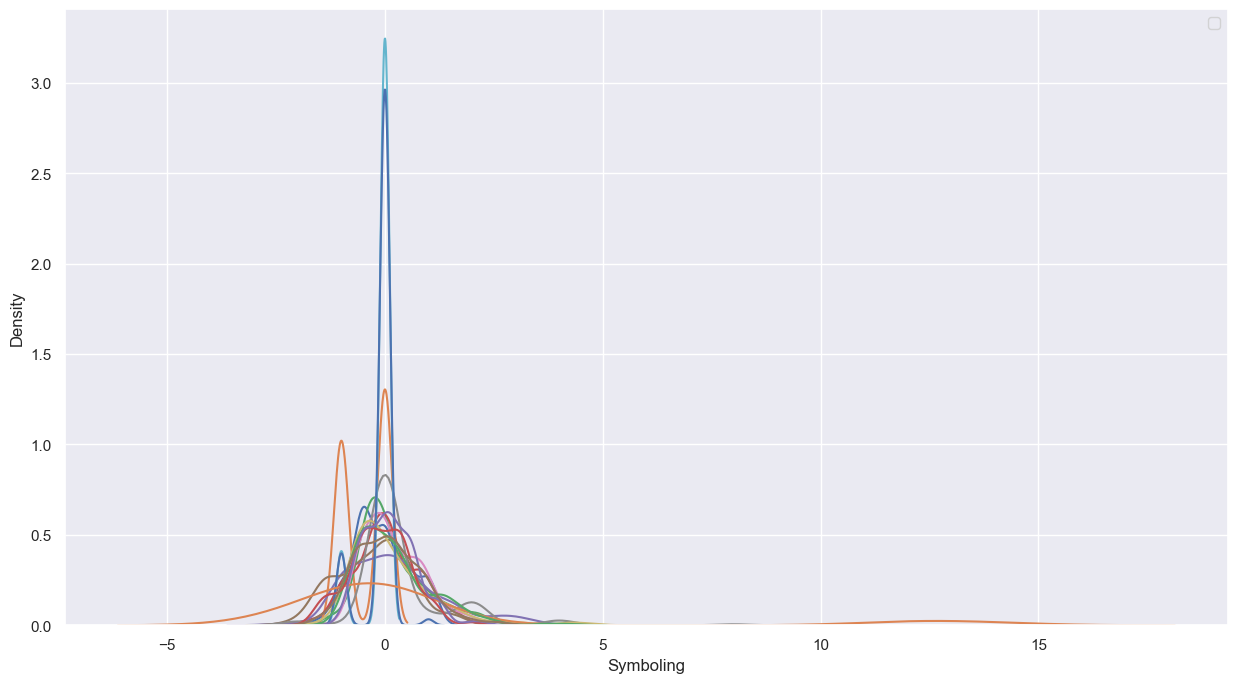

In [305]:
sns.set(rc = {'figure.figsize':(15,8)})
for i in selected_features:
    sns.kdeplot(robust_scaled_df[i], legend=True)
plt.legend()
plt.show()

In [314]:
# Apply Robust Scaling to the datset
clean_df = df.copy()

clean_df.drop(labels=['Symboling','Door Number', 'Wheel Base', 'Car Length', 'Car Width', 'Car Height', 'Curb Weight', 
                     'Cylinder Number', 'Engine Size', 'Bore Ratio', 'Stroke', 'Compression Ratio', 'Horse Power', 
                     'Peak RPM', 'City MPG', 'Highway MPG'], axis="columns", inplace=True)
clean_df[['Symboling','Door Number', 'Wheel Base', 'Car Length', 'Car Width', 'Car Height', 'Curb Weight', 
                     'Cylinder Number', 'Engine Size', 'Bore Ratio', 'Stroke', 'Compression Ratio', 'Horse Power', 
                     'Peak RPM', 'City MPG', 'Highway MPG']] = robust_scaled_df[['Symboling','Door Number', 'Wheel Base', 'Car Length', 'Car Width', 'Car Height', 'Curb Weight', 
                     'Cylinder Number', 'Engine Size', 'Bore Ratio', 'Stroke', 'Compression Ratio', 'Horse Power', 
                     'Peak RPM', 'City MPG', 'Highway MPG']]
clean_df.head()

Price  Car Brand_Alfa-romero  Car Brand_Audi  Car Brand_Bmw  \
0  13495                      1               0              0   
1  16500                      1               0              0   
2  16500                      1               0              0   
3  13950                      0               1              0   
4  17450                      0               1              0   

   Car Brand_Buick  Car Brand_Chevrolet  Car Brand_Dodge  Car Brand_Honda  \
0                0                    0                0                0   
1                0                    0                0                0   
2                0                    0                0                0   
3                0                    0                0                0   
4                0                    0                0                0   

   Car Brand_Isuzu  Car Brand_Jaguar  Car Brand_Mazda  Car Brand_Mercury  \
0                0                 0                0                  0   
1                0                 0                0                  0   
2                0                 0                0                  0   
3                0                 0                0                  0   
4                0                 0                0                  0   

   Car Brand_Mitsubishi  Car Brand_Nissan  Car Brand_Peugeot  \
0                     0                 0                  0   
1                     0                 0                  0   
2                     0                 0                  0   
3                     0                 0                  0   
4                     0                 0                  0   

   Car Brand_Plymouth  Car Brand_Porsche  Car Brand_Renault  Car Brand_Saab  \
0                   0                  0                  0               0   
1                   0                  0                  0               0   
2                   0                  0                  0               0   
3                   0                  0                  0               0   
4                   0                  0                  0               0   

   Car Brand_Subaru  Car Brand_Toyota  Car Brand_Volkswagen  Car Brand_Volvo  \
0                 0                 0                     0                0   
1                 0                 0                     0                0   
2                 0                 0                     0                0   
3                 0                 0                     0                0   
4                 0                 0                     0                0   

   Fuel Type_diesel  Fuel Type_gas  Aspiration Type_std  \
0                 0              1                    1   
1                 0              1                    1   
2                 0              1                    1   
3                 0              1                    1   
4                 0              1                    1   

   Aspiration Type_turbo  Car Body_convertible  Car Body_hardtop  \
0                      0                     1                 0   
1                      0                     1                 0   
2                      0                     0                 0   
3                      0                     0                 0   
4                      0                     0                 0   

   Car Body_hatchback  Car Body_sedan  Car Body_wagon  Drive Wheel_4wd  \
0                   0               0               0                0   
1                   0               0               0                0   
2                   1               0               0                0   
3                   0               1               0                0   
4                   0               1               0                1   

   Drive Wheel_fwd  Drive Wheel_rwd  Engine Location_front  \
0                0                1                      1   
1           

### Modeling 

#### Apply Principal Component Analysis - PCA 

In [315]:
x_clean = clean_df.drop(['Price'] , axis = 1).values
y_clean = clean_df['Price'].values

In [316]:
x_clean.shape

(205, 67)

In [340]:
# Define the features for each group
pca_features_group1 = ['Car Length', 'Car Width', 'Car Height', 'Wheel Base', 'Curb Weight']
pca_features_group2 = ['Cylinder Number','Engine Size', 'Bore Ratio', 'Stroke', 
                       'Compression Ratio', 'Horse Power', 'Peak RPM']
pca_features_group3 = ['City MPG', 'Highway MPG']

# Apply PCA to each group of features
pca_group1 = PCA(n_components=1)
pca_group2 = PCA(n_components=1)
pca_group3 = PCA(n_components=1)

# Apply PCA to the selected features in each group
x_pca_group1 = pca_group1.fit_transform(x_clean[:, 54:59])
x_pca_group2 = pca_group2.fit_transform(x_clean[:, 59:65])
x_pca_group3 = pca_group3.fit_transform(x_clean[:, 66::])

# Create DataFrames for each group of PCA-transformed data
df_pca_group1 = pd.DataFrame(x_pca_group1, columns=['PCA Car Dimensions Measurements'])
df_pca_group2 = pd.DataFrame(x_pca_group2, columns=['PCA Engine Specifications'])
df_pca_group3 = pd.DataFrame(x_pca_group3, columns=['PCA Car Efficiency Metrics'])

# Concatenate the DataFrames horizontally
x_pca_df = pd.concat([df_pca_group1, df_pca_group2, df_pca_group3], axis=1)

x_pca_np = np.concatenate((df_pca_group1, df_pca_group2, df_pca_group3), axis=1)


In [341]:
x_pca_df

PCA Car Dimensions Measurements  PCA Engine Specifications  \
0                          -1.078822                  -0.844557   
1                          -1.078822                  -0.844557   
2                           0.696196                  -0.876053   
3                          -0.016424                   0.109414   
4                           0.733462                  -1.890191   
5                           0.544387                  -1.885391   
6                           2.758137                  -1.885391   
7                           2.811902                  -1.885391   
8                           2.876420                  -1.915100   
9                           1.093745                  -2.930312   
10                         -0.621321                  -1.922608   
11                         -0.621321                  -1.922608   
12                          0.556349                  -0.757909   
13                          0.583232                  -0.757909   
14                          1.719833                  -0.757909   
15                          1.805369                  -1.930320   
16                          2.173821                  -1.930320   
17                          3.450928                  -1.930320   
18                         -3.719202                  -0.801744   
19                         -1.798862                  -0.848363   
20                         -1.711581                  -0.848363   
21                         -1.866153                  -0.859512   
22                         -1.866153                  -0.859512   
23                         -1.742982                  -2.880612   
24                         -1.821674                  -0.859512   
25                         -1.810921                  -0.859512   
26                         -1.810921                  -0.859512   
27                         -1.712189                  -2.880612   
28                         -0.312047                  -1.812026   
29                         -0.085021                  -2.856595   
30                         -2.249909                  -0.772854   
31                         -2.198099                  -0.921611   
32                         -1.617279                   0.142184   
33                         -1.566936                  -0.921611   
34                         -1.559115                  -0.921611   
35                         -1.113585                  -0.921611   
36                         -1.333610                  -0.921611   
37                         -0.650459                  -0.903923   
38                         -0.624555                  -0.903923   
39                         -0.372567                  -0.903923   
40                         -1.289200                  -0.903923   
41                         -0.293875                  -0.918324   
42                         -0.374245                  -0.884495   
43                         -1.797411                  -1.782508   
44                         -1.798862                  -0.848363   
45                         -1.781755                  -0.848363   
46                         -0.405145                  -0.818480   
47                          3.225188                  -1.836546   
48                          3.225188                  -1.836546   
49                          6.081475                   1.038039   
50                         -1.265802                  -0.802437   
51                         -1.260915                  -0.802437   
52                         -1.258471                  -0.802437   
53                         -1.075181                  -0.802437   
54                         -1.072737                  -0.802437   
55                         -1.787102                  -0.947491   
56                         -1.787102                  -0.947491   
57                         -1.784658                  -0.947491   
58                         -1.728449                

In [356]:
# Define the features for the new group
remaining_features = [
        'Car Brand_Alfa-romero','Car Brand_Audi','Car Brand_Bmw','Car Brand_Buick',
        'Brand_Chevrolet','Car Brand_Dodge','Car Brand_Honda','Car Brand_Isuzu','Car Brand_Jaguar',
        'Car Brand_Mazda','Car Brand_Mercury','Car Brand_Mitsubishi','Car Brand_Nissan','Car Brand_Peugeot',
        'Car Brand_Plymouth','Car Brand_Porsche','Car Brand_Renault','Car Brand_Saab','Car Brand_Subaru',
        'Car Brand_Toyota','Car Brand_Volkswagen','Car Brand_Volvo','Fuel Type_diesel','Fuel Type_gas',
        'Aspiration Type_std','Aspiration Type_turbo','Car Body_convertible','Car Body_hardtop','Car Body_hatchback',
        'Car Body_sedan','Car Body_wagon','Drive Wheel_4wd','Drive Wheel_fwd','Drive Wheel_rwd',
        'Engine Location_front','Engine Location_rear','Engine Type_dohc','Engine Type_dohcv','Engine Type_l',
        'Engine Type_ohc','Engine Type_ohcf','Engine Type_ohcv','Engine Type_rotor','Fuel System_1bbl',
        'Fuel System_2bbl','Fuel System_4bbl','Fuel System_idi','Fuel System_mfi','Fuel System_mpfi',
        'Fuel System_spdi','Fuel System_spfi','Symboling','Door Number'
]
# Apply PCA to the selected features in the new group
pca_new_group = PCA(n_components=1)
x_pca_new_group = pca_new_group.fit_transform(x_clean[:,54].reshape(-1, 1))

# Create a DataFrame for the new group of PCA-transformed data
df_pca_new_group = pd.DataFrame(x_pca_new_group, columns=['PCA other Features'])

# Concatenate the new PCA-transformed data with the previously transformed data
x_pca_combined = pd.concat([x_pca_df, df_pca_new_group], axis=1)

x_pca_combined_np = np.concatenate([x_pca_df, df_pca_new_group], axis=1)


In [355]:
x_pca_combined

PCA Car Dimensions Measurements  PCA Engine Specifications  \
0                          -1.078822                  -0.844557   
1                          -1.078822                  -0.844557   
2                           0.696196                  -0.876053   
3                          -0.016424                   0.109414   
4                           0.733462                  -1.890191   
5                           0.544387                  -1.885391   
6                           2.758137                  -1.885391   
7                           2.811902                  -1.885391   
8                           2.876420                  -1.915100   
9                           1.093745                  -2.930312   
10                         -0.621321                  -1.922608   
11                         -0.621321                  -1.922608   
12                          0.556349                  -0.757909   
13                          0.583232                  -0.757909   
14                          1.719833                  -0.757909   
15                          1.805369                  -1.930320   
16                          2.173821                  -1.930320   
17                          3.450928                  -1.930320   
18                         -3.719202                  -0.801744   
19                         -1.798862                  -0.848363   
20                         -1.711581                  -0.848363   
21                         -1.866153                  -0.859512   
22                         -1.866153                  -0.859512   
23                         -1.742982                  -2.880612   
24                         -1.821674                  -0.859512   
25                         -1.810921                  -0.859512   
26                         -1.810921                  -0.859512   
27                         -1.712189                  -2.880612   
28                         -0.312047                  -1.812026   
29                         -0.085021                  -2.856595   
30                         -2.249909                  -0.772854   
31                         -2.198099                  -0.921611   
32                         -1.617279                   0.142184   
33                         -1.566936                  -0.921611   
34                         -1.559115                  -0.921611   
35                         -1.113585                  -0.921611   
36                         -1.333610                  -0.921611   
37                         -0.650459                  -0.903923   
38                         -0.624555                  -0.903923   
39                         -0.372567                  -0.903923   
40                         -1.289200                  -0.903923   
41                         -0.293875                  -0.918324   
42                         -0.374245                  -0.884495   
43                         -1.797411                  -1.782508   
44                         -1.798862                  -0.848363   
45                         -1.781755                  -0.848363   
46                         -0.405145                  -0.818480   
47                          3.225188                  -1.836546   
48                          3.225188                  -1.836546   
49                          6.081475                   1.038039   
50                         -1.265802                  -0.802437   
51                         -1.260915                  -0.802437   
52                         -1.258471                  -0.802437   
53                         -1.075181                  -0.802437   
54                         -1.072737                  -0.802437   
55                         -1.787102                  -0.947491   
56                         -1.787102                  -0.947491   
57                         -1.784658                  -0.947491   
58                         -1.728449                

In [357]:
print("Number of original features is {} and of reduced features is {}".format(x_clean.shape[1], x_pca_combined.shape[1]))

Number of original features is 67 and of reduced features is 4


We can combine all features also using PCA 

In [358]:
pca = PCA(n_components=0.99)
x_reduced = pca.fit_transform(x_clean)

In [359]:
print("Number of original features is {} and of reduced features is {}".format(x_clean.shape[1], x_reduced.shape[1]))

Number of original features is 67 and of reduced features is 30


In [363]:
x_reduced_df = pd.DataFrame(x_reduced)
x_reduced_df

0         1         2         3         4         5         6   \
0    -1.168847 -0.380973  2.044417 -1.079120  0.386089  1.529215 -0.727304   
1    -1.168847 -0.380973  2.044417 -1.079120  0.386089  1.529215 -0.727304   
2    -1.045390  1.502403  1.873636  0.415435  0.226161  0.791151  0.464624   
3     0.086881 -0.158709 -0.459960 -0.377715 -1.075401 -0.294732  0.067703   
4    -1.913059  1.276819 -0.179014 -0.109633 -0.812280  0.219826 -0.054314   
5    -1.947873  0.835438  0.270786 -0.003795 -0.832075 -0.375467  0.148583   
6    -1.650098  2.541368 -1.230018 -0.186111 -0.899031 -1.509338  0.381202   
7    -1.668327  2.561790 -1.208600 -0.352989 -0.483426 -1.366074  1.072007   
8    -1.644899  3.065753 -1.118613 -0.846885 -0.861024 -1.711199 -0.102711   
9    -2.924298  1.902517  0.478238 -0.994073 -0.055584 -0.655254 -0.008937   
10   -1.957632 -0.151529 -0.239259 -0.682153 -0.904318  1.071674  0.016031   
11   -1.902313 -0.060203 -0.863291 -0.291946 -1.106560  1.069654 -0.432583   
12   -0.776917  1.479483  0.252833  1.394150  0.446078  0.841213 -0.300210   
13   -0.749948  1.532238 -0.038887  1.529447  0.315806  0.860914 -0.551955   
14   -0.660392  2.435450 -0.409558  1.082602  0.401967  0.466268 -0.223131   
15   -1.814392  3.477104  0.044690  0.823747 -0.810293  0.537337 -0.136044   
16   -1.835809  3.714105  0.590475  0.488845 -0.610362  0.160474 -0.180440   
17   -1.626988  4.864986 -0.719763  0.375019 -0.700651 -0.410297  0.215862   
18   -1.009441 -5.257320  0.577502  0.645076  0.581355  0.667784  0.589087   
19   -0.989092 -2.896784  0.578273  0.612136  0.228034 -0.335085  0.480490   
20   -0.890979 -2.683818 -0.241667  1.168858 -0.532911 -0.140089 -0.634835   
21   -1.059686 -2.946348  1.030082  0.458707  0.065331 -0.535315  0.185911   
22   -1.099071 -2.732588  1.032259  0.255655  0.052683 -0.455597  0.127653   
23   -3.094155 -1.479489  0.977544 -0.790643 -0.093131 -0.372336 -0.361977   
24   -1.070752 -2.667265  0.739168  0.387435 -0.074036 -0.435075 -0.124118   
25   -1.019223 -2.569274  0.415624  0.693375 -0.668644 -0.242619 -0.887083   
26   -1.019223 -2.569274  0.415624  0.693375 -0.668644 -0.242619 -0.887083   
27   -3.041089 -1.367184  0.652438 -0.488709 -0.683693 -0.178945 -1.124972   
28   -1.689715 -0.363374 -2.219555  0.799597  0.318551  0.208373  0.831681   
29   -2.952353  0.632362  1.267610 -1.272979  0.796977 -1.168828 -0.398890   
30   -0.932418 -4.026722  1.536836  1.084175  0.338434 -0.673773  0.590345   
31   -1.229898 -3.080928  1.844200 -0.130739 -0.960876 -0.321018  0.668983   
32    0.000065 -2.964925  0.783846  0.273587 -0.478184 -0.631004  0.945985   
33   -1.111041 -2.285754  0.902404 -0.202882 -0.946922 -0.504251  0.936494   
34   -1.110441 -2.280168  0.901795 -0.204445 -0.945343 -0.503887  0.936482   
35   -0.934201 -1.752811 -0.529846  0.376361 -1.712540 -0.252833  0.163294   
36   -0.920201 -1.961242 -1.101631  0.487271 -1.394448  0.378658  1.491728   
37   -0.980475 -1.168095  0.194609 -0.233629 -0.630632 -0.646160  0.873227   
38   -0.978487 -1.149591  0.192591 -0.238807 -0.625401 -0.644952  0.873188   
39   -0.867516 -0.865078 -0.705022  0.212741 -1.371653 -0.387827  0.022736   
40   -0.947679 -1.468432 -0.566404  0.451571 -1.394670  0.301540 -0.118422   
41   -0.946036 -0.323321 -0.655817 -0.123920 -1.477278 -0.042061 -0.057098   
42   -0.965359 -0.772865  0.290982 -0.067136 -0.553393 -0.732123 -0.394960   
43   -1.903827 -1.413996 -0.526190  0.616550  0.311458  1.238862 -1.095754   
44   -0.938914 -2.803098  0.253386  0.917084 -0.370030 -0.133424 -0.318112   
45   -0.897488 -2.728439 -0.204776  1.179103 -0.535547 -0.124412 -0.668298   
46   -0.937233 -0.367371  0.764582 -0.833133  0.748436  0.069066  0.107030   
47   -1.594843  5.430638  0.043142  0.575036  0.320335 -0.401978 -0.654557   
48   -1.594843  5.430638  0.043142  0.575036  0.320335 -0.401978 -0.654557   
49    1.025911  8.256246  4.983896  3.994881 -0.485427 -0.078823 -0.682043   
50   -0.966501 -2.039497  0.058166

### Train Test Split

In [380]:
def train_and_evaluate_models(X_train, X_test, y_train, y_test):
    # Define the models and their respective parameter grids for hyperparameter tuning

    models = {
        'Linear Regression': (LinearRegression(), {}),
        'Decision Tree': (DecisionTreeClassifier(), {'criterion': ['gini', 'entropy'],'max_depth': [None, 5, 10 , 15]}),
        'Random Forest': (RandomForestClassifier(), {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10],'min_samples_leaf': [1,5,10]}),
        'Gradient Boosting' : (GradientBoostingRegressor(), {'n_estimators': [100, 200, 300],'learning_rate': [0.1, 0.01, 0.001],'max_depth': [3, 5, 7]}),
        'XGBoost': (xgb.XGBRegressor(), {'learning_rate': [0.1, 0.01, 0.001], 'max_depth': [3, 5, 7]}),
        'Lasso' : (Lasso(), {'alpha': [0.01, 0.1, 1, 10]}), 
        'Ridge' : (Ridge(), {'alpha': [0.01, 0.1, 1, 10]}),
        'SVM': (SVC(), {'C': range(1, 151), 'kernel': ['poly'],'gamma': ['scale', 'auto']}),
        'Neural Network': (MLPClassifier(), {'hidden_layer_sizes': [(100,),(50, 50), (20, 20, 20)], 'activation': ['relu', 'tanh'], 'solver': ['adam']})
    }
    for model_name, (model, param_grid) in models.items():
        print(f"Training and evaluating {model_name}")

        # Hyperparameter tuning using GridSearchCV
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=2)
        grid_search.fit(X_train, y_train)  # Use the scaled features

        best_model = grid_search.best_estimator_

        # Evaluation on testing data
        y_test_pred = best_model.predict(X_test)  # Predict using scaled features
        test_mae = mean_absolute_error(y_test, y_test_pred)
        test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

        print(f"--- {model_name} ---")
        print("Testing Data:")
        print(f"Mean Absolute Error: {test_mae}")
        print(f"Root Mean Squared Error: {test_rmse}")

        # Plot predicted vs. actual prices
        plt.figure()
        plt.scatter(y_test, y_test_pred)
        plt.title(f"Predicted vs. Actual Prices - {model_name}")
        plt.xlabel("Actual Price")
        plt.ylabel("Predicted Price")
        plt.show()   

        print(f"Best Model:{best_model}")

        print("-------------------------------\n")

Training and evaluating Linear Regression
--- Linear Regression ---
Testing Data:
Mean Absolute Error: 1593806629650492.5
Root Mean Squared Error: 5799304204842690.0


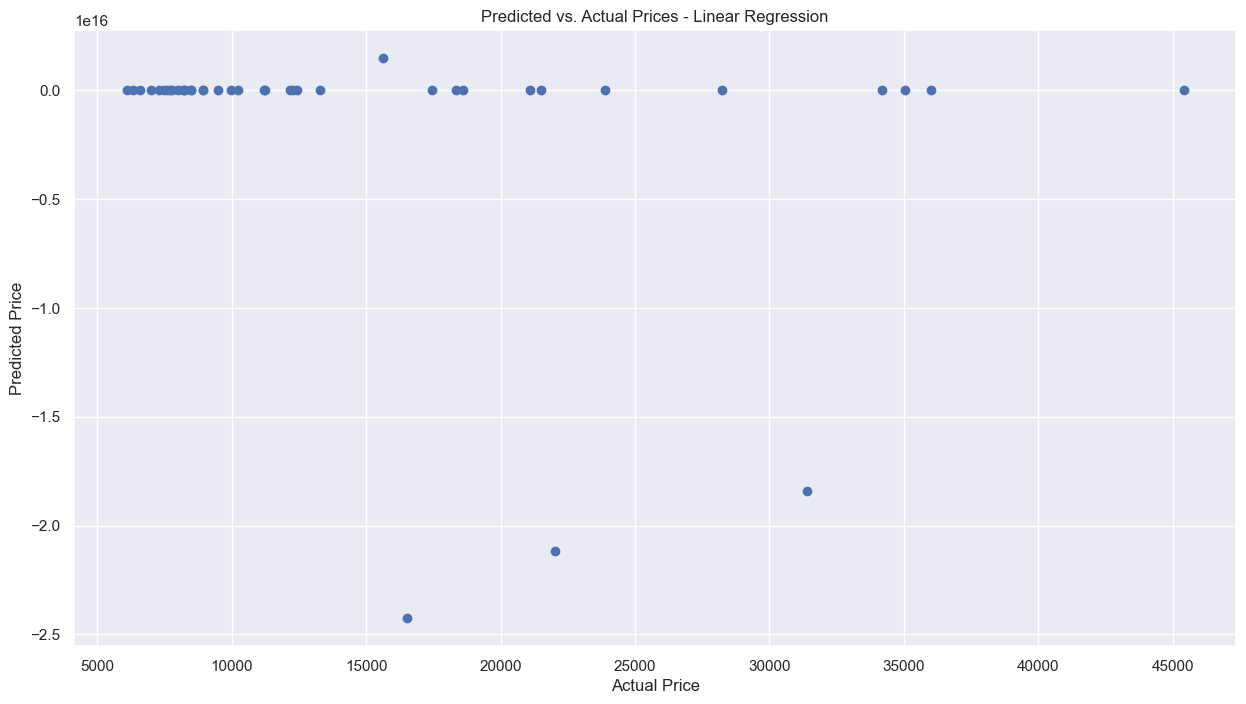

Best Model:LinearRegression()
-------------------------------

Training and evaluating Decision Tree
--- Decision Tree ---
Testing Data:
Mean Absolute Error: 3293.1951219512193
Root Mean Squared Error: 5760.489073494859


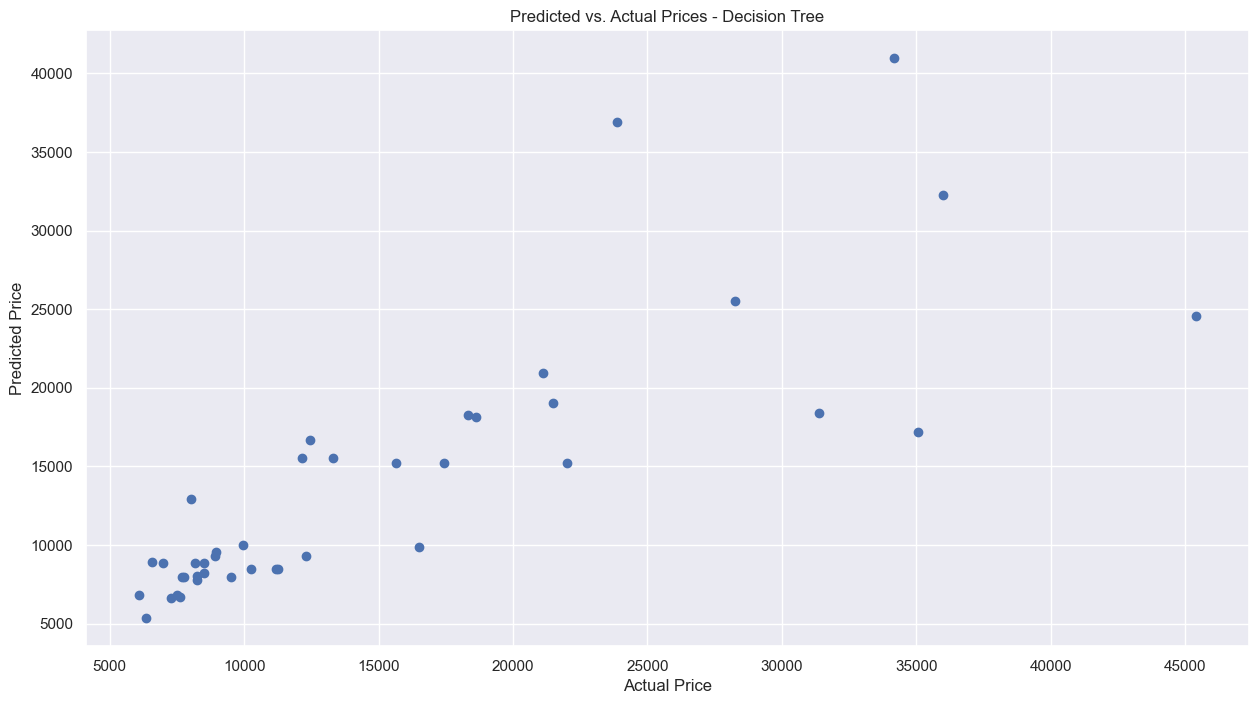

Best Model:DecisionTreeClassifier(criterion='entropy')
-------------------------------

Training and evaluating Random Forest
--- Random Forest ---
Testing Data:
Mean Absolute Error: 3311.487804878049
Root Mean Squared Error: 5948.479008300788


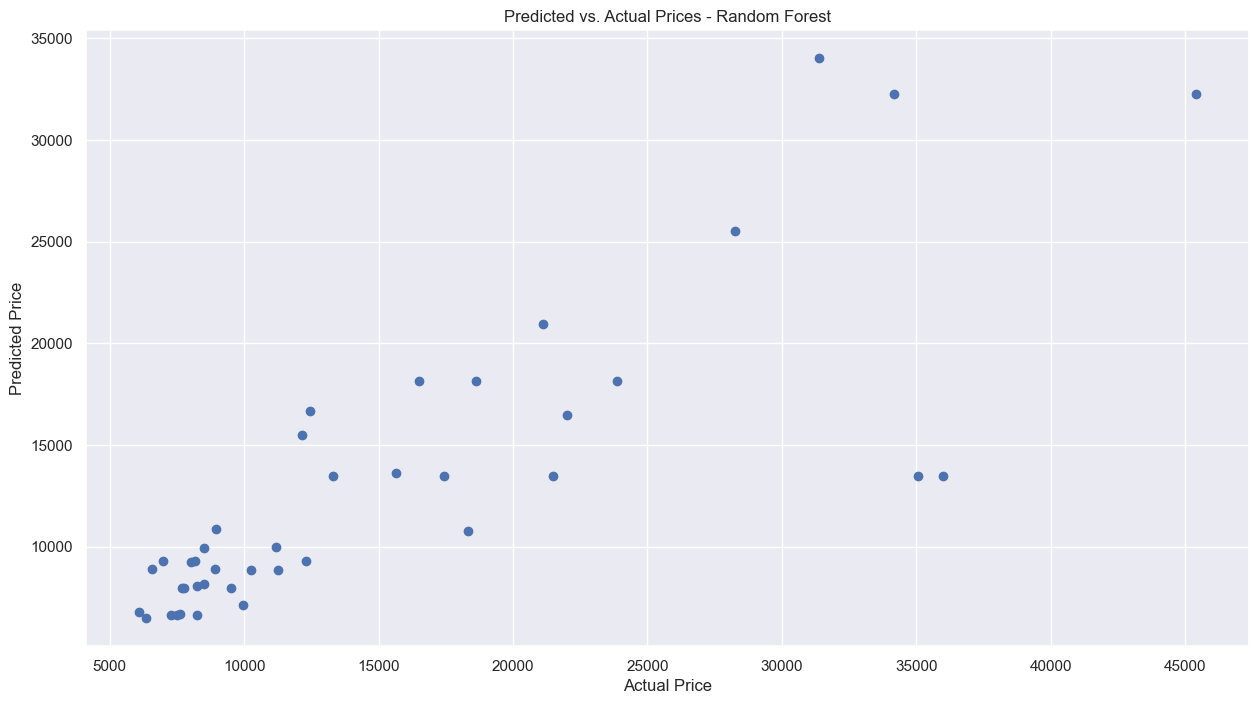

Best Model:RandomForestClassifier(max_depth=5, min_samples_leaf=5, n_estimators=200)
-------------------------------

Training and evaluating Gradient Boosting
--- Gradient Boosting ---
Testing Data:
Mean Absolute Error: 1799.3412083580536
Root Mean Squared Error: 2485.6136942299013


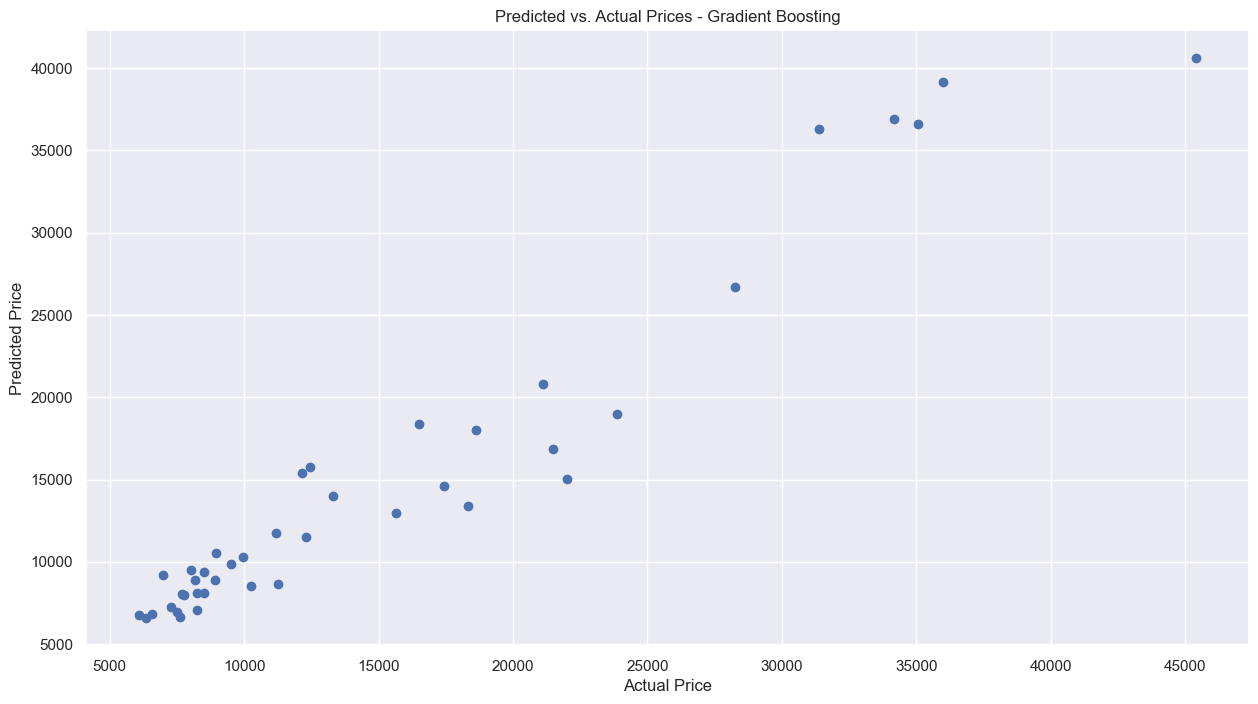

Best Model:GradientBoostingRegressor(max_depth=7)
-------------------------------

Training and evaluating XGBoost
--- XGBoost ---
Testing Data:
Mean Absolute Error: 1938.4936761623476
Root Mean Squared Error: 2748.6143166809284


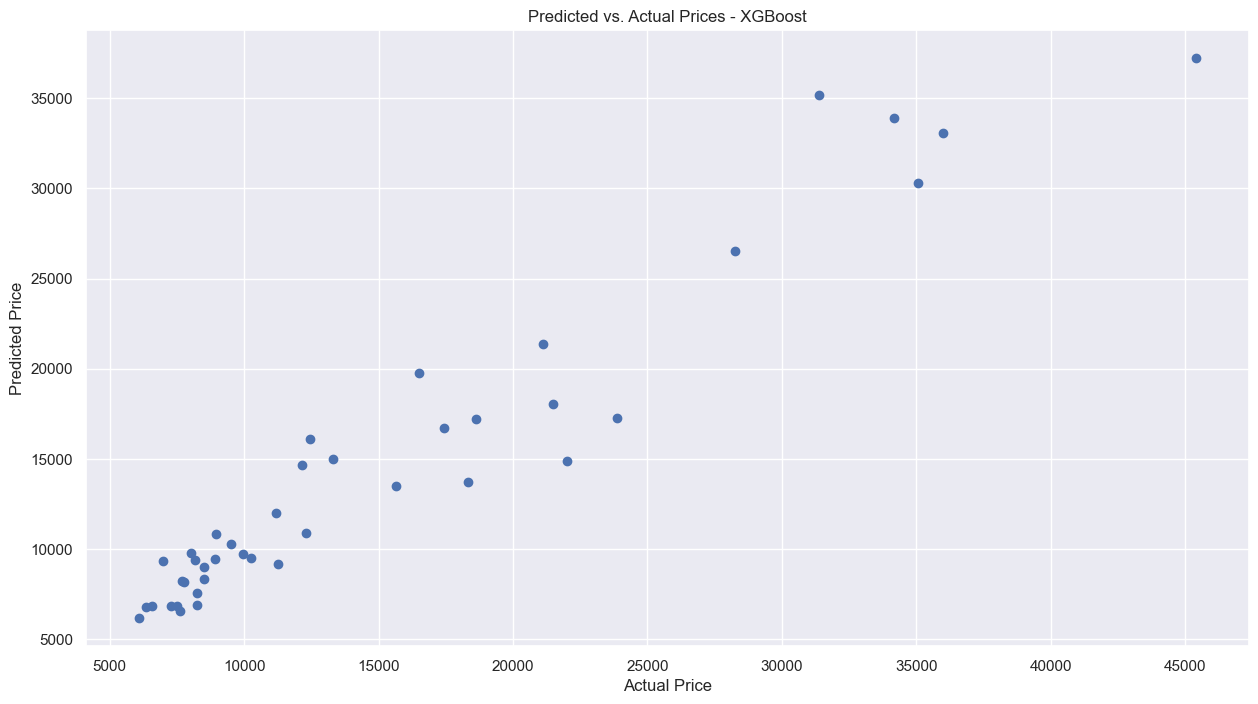

Best Model:XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)
-------------------------------

Training and evaluating Lasso
--- Lasso ---
Testing Data:
Mean Absolute Error: 2142.4802764987276
Root Mean Squared Error: 3365.6030892844283


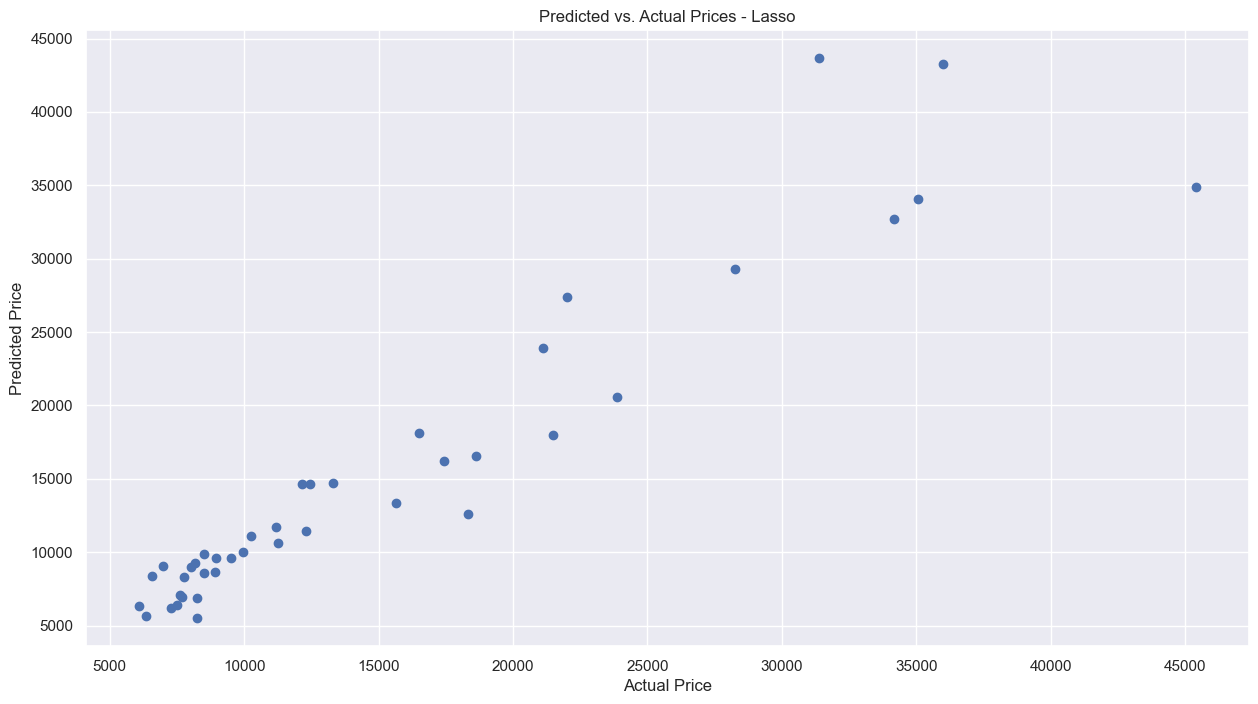

Best Model:Lasso(alpha=10)
-------------------------------

Training and evaluating Ridge
--- Ridge ---
Testing Data:
Mean Absolute Error: 2108.1900467790138
Root Mean Squared Error: 3081.0547181917586


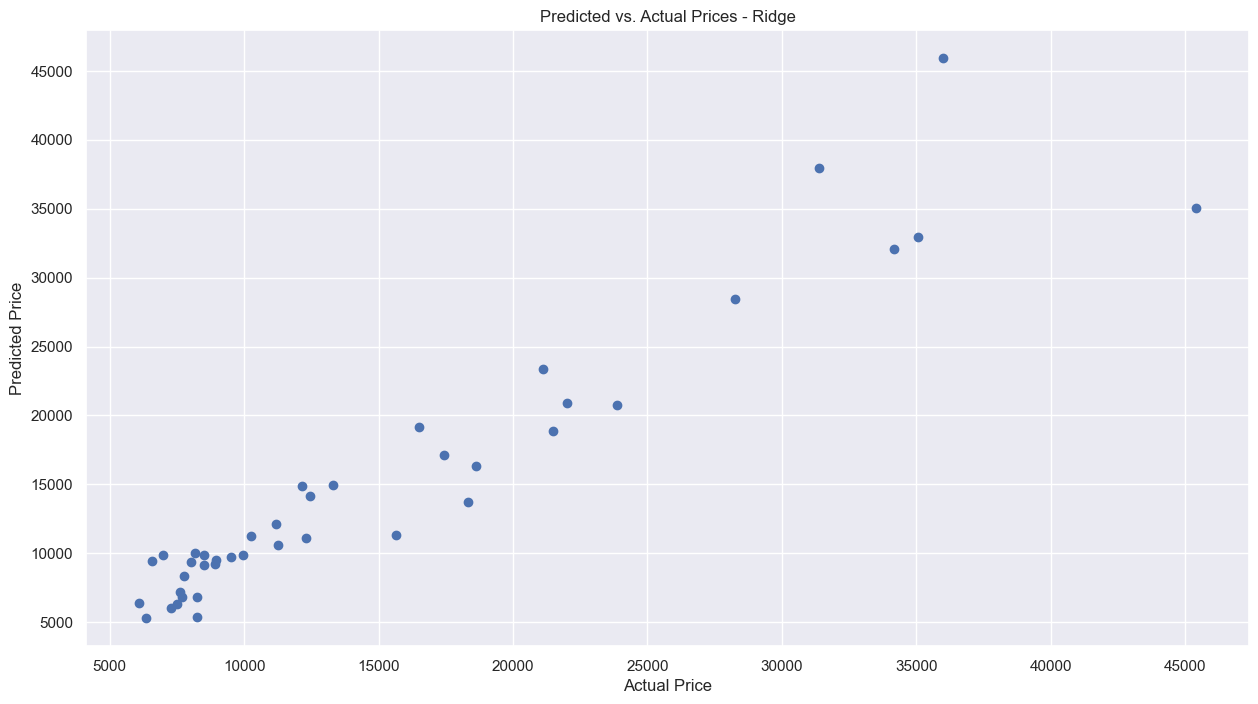

Best Model:Ridge(alpha=1)
-------------------------------

Training and evaluating SVM
--- SVM ---
Testing Data:
Mean Absolute Error: 4381.634146341464
Root Mean Squared Error: 6504.512645548286


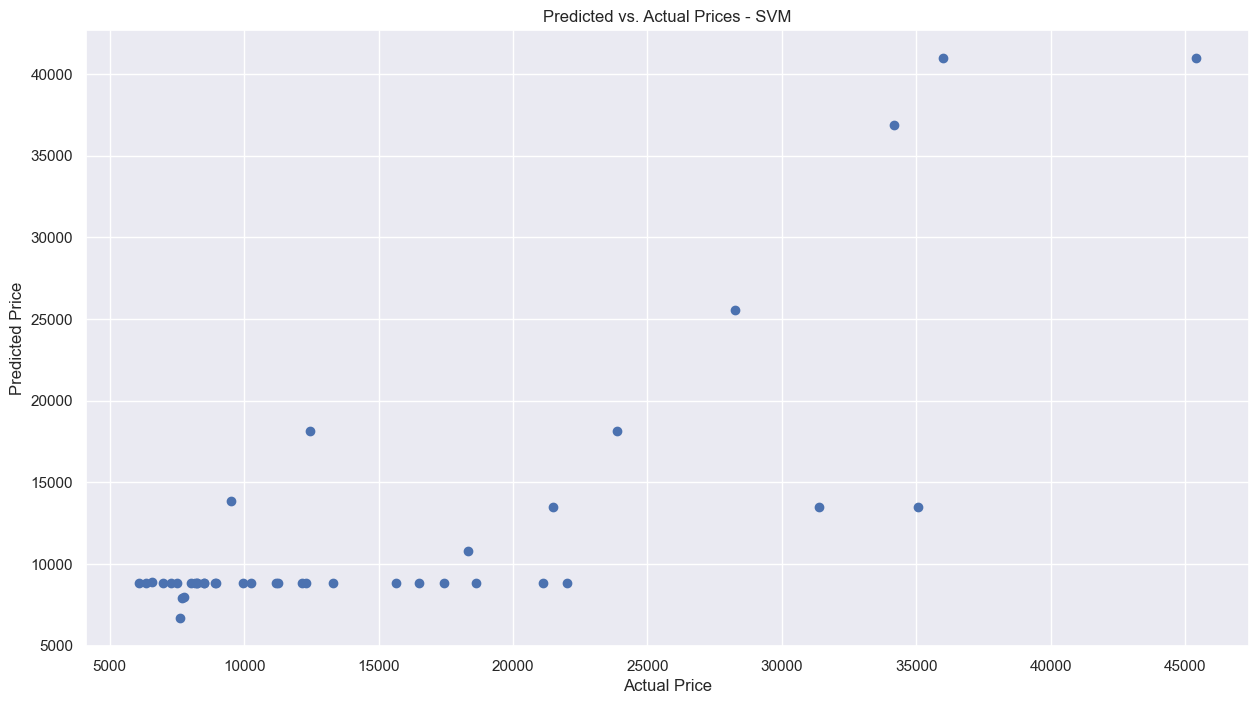

Best Model:SVC(C=1, kernel='poly')
-------------------------------

Training and evaluating Neural Network
--- Neural Network ---
Testing Data:
Mean Absolute Error: 3597.5853658536585
Root Mean Squared Error: 5638.288766949791


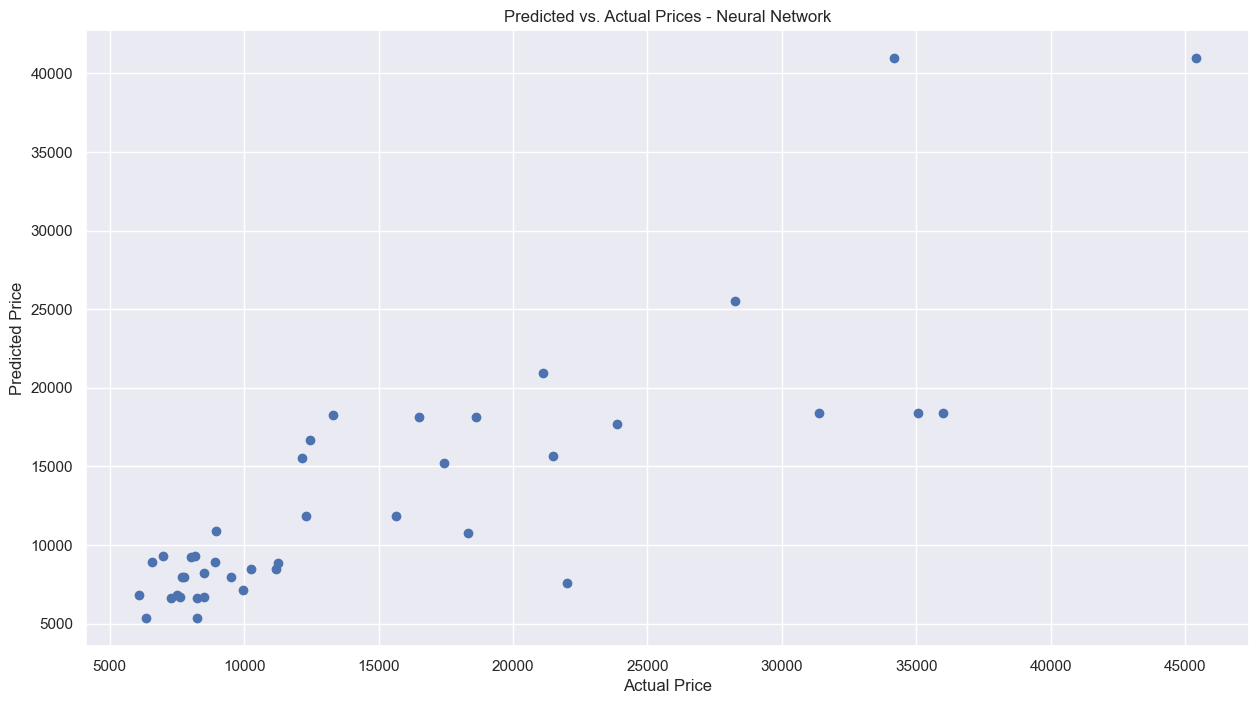

Best Model:MLPClassifier(hidden_layer_sizes=(50, 50))
-------------------------------



In [381]:
# First Split on Origin Dataset - 67 Features
X_train_orig, X_test_orig, y_train, y_test = train_test_split(x_clean, y_clean, test_size=0.2, random_state=365)
# Train and evaluate models on each split
train_and_evaluate_models(X_train_orig, X_test_orig, y_train, y_test)

Training and evaluating Linear Regression
--- Linear Regression ---
Testing Data:
Mean Absolute Error: 2581.0909383225794
Root Mean Squared Error: 3310.1012771494093


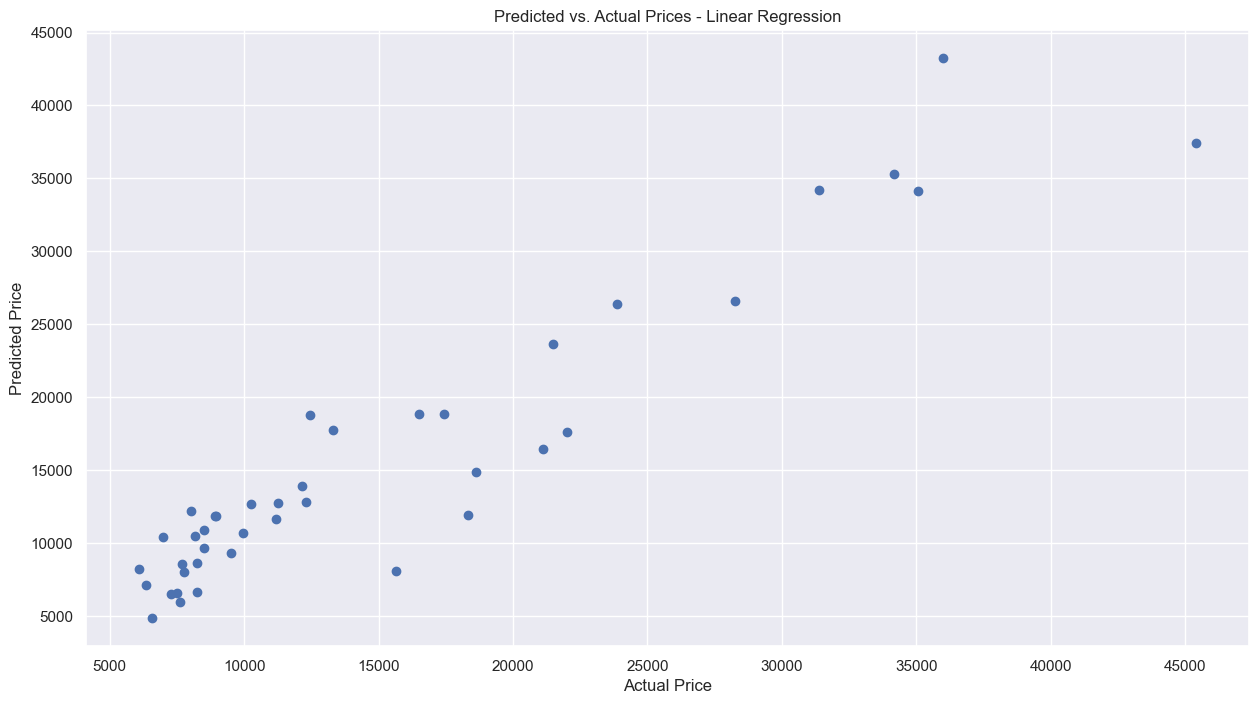

Best Model:LinearRegression()
-------------------------------

Training and evaluating Decision Tree
--- Decision Tree ---
Testing Data:
Mean Absolute Error: 2981.268292682927
Root Mean Squared Error: 5035.060263160565


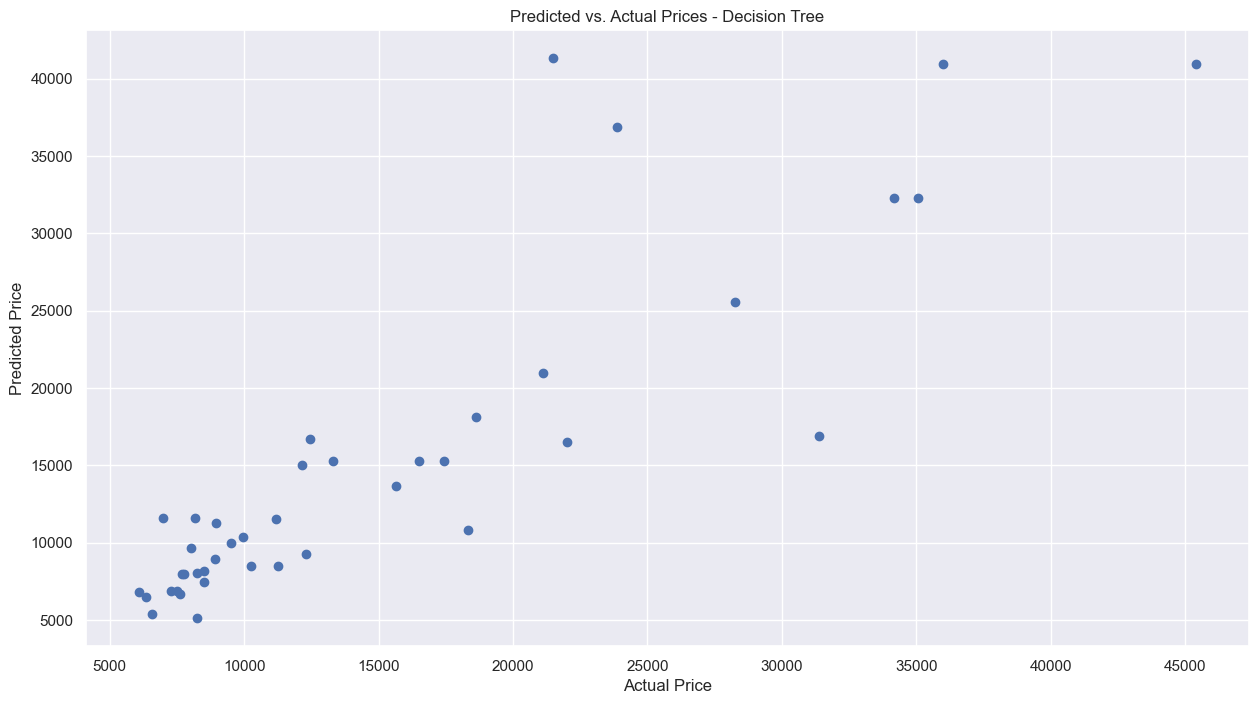

Best Model:DecisionTreeClassifier(criterion='entropy', max_depth=10)
-------------------------------

Training and evaluating Random Forest
--- Random Forest ---
Testing Data:
Mean Absolute Error: 2489.7073170731705
Root Mean Squared Error: 3831.948342235445


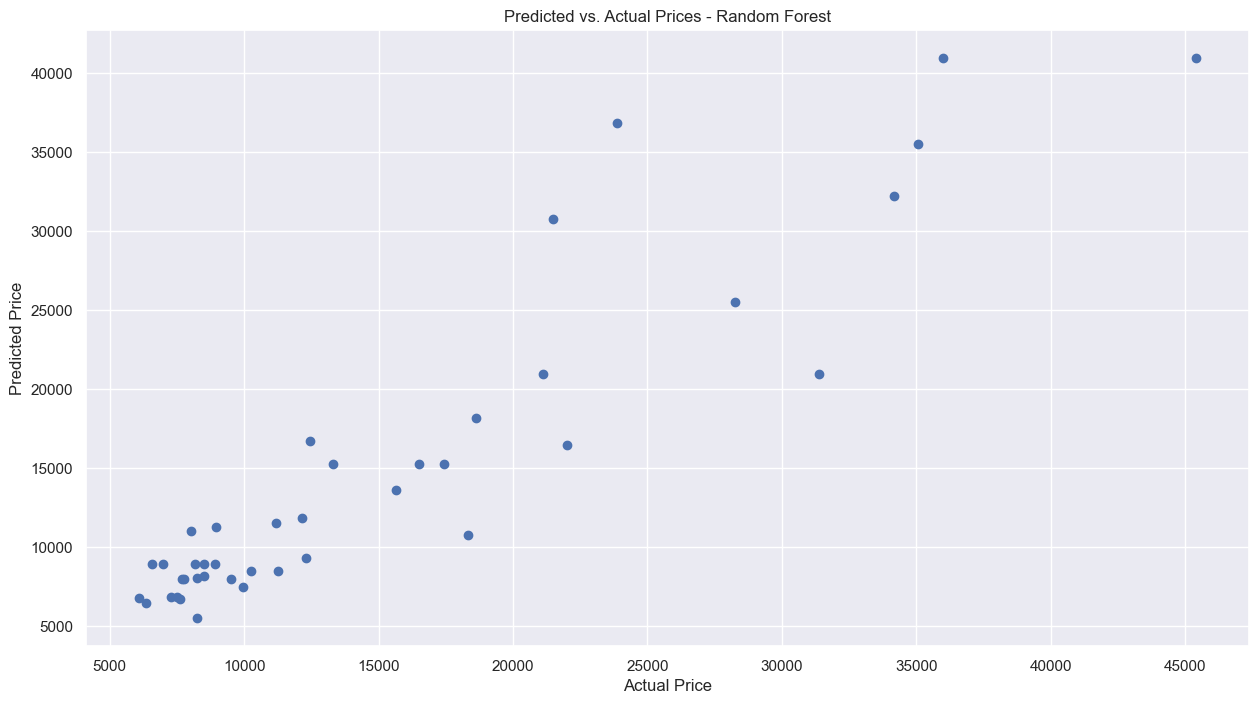

Best Model:RandomForestClassifier()
-------------------------------

Training and evaluating Gradient Boosting
--- Gradient Boosting ---
Testing Data:
Mean Absolute Error: 2247.0324333095396
Root Mean Squared Error: 3398.4220042370252


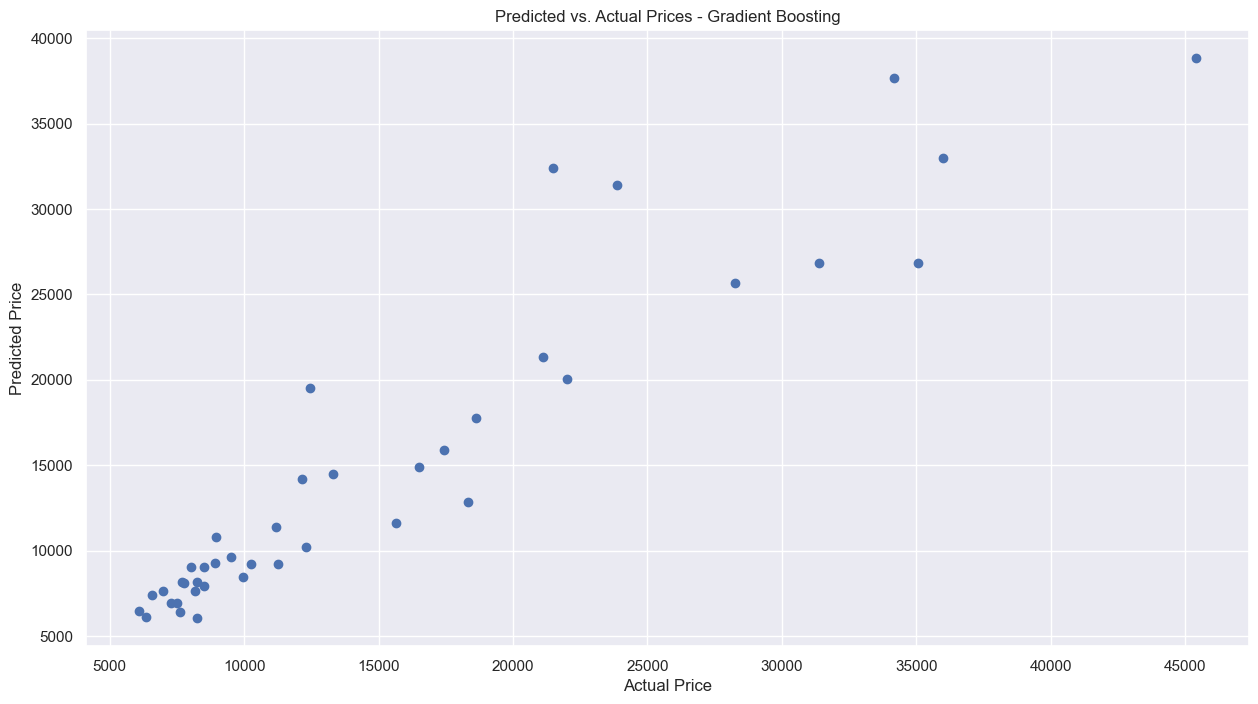

Best Model:GradientBoostingRegressor(n_estimators=200)
-------------------------------

Training and evaluating XGBoost
--- XGBoost ---
Testing Data:
Mean Absolute Error: 2305.000309641768
Root Mean Squared Error: 3628.287834371881


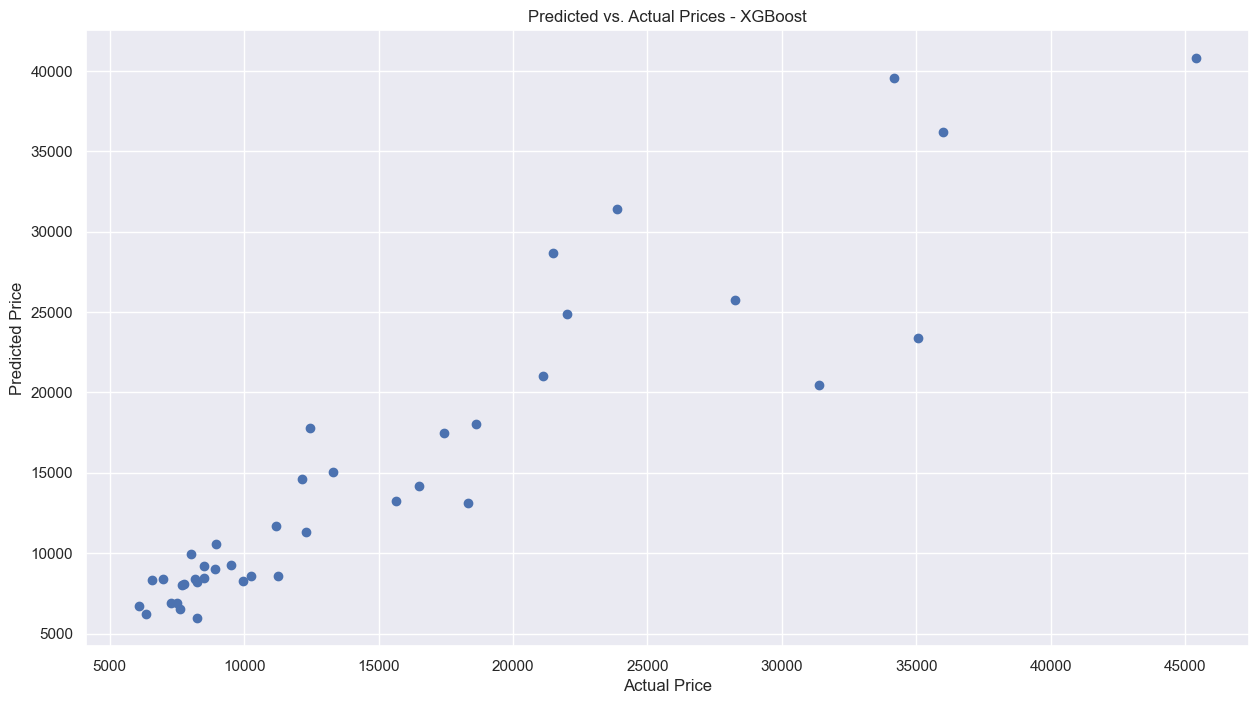

Best Model:XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)
-------------------------------

Training and evaluating Lasso
--- Lasso ---
Testing Data:
Mean Absolute Error: 2581.156985869029
Root Mean Squared Error: 3310.1513532625745


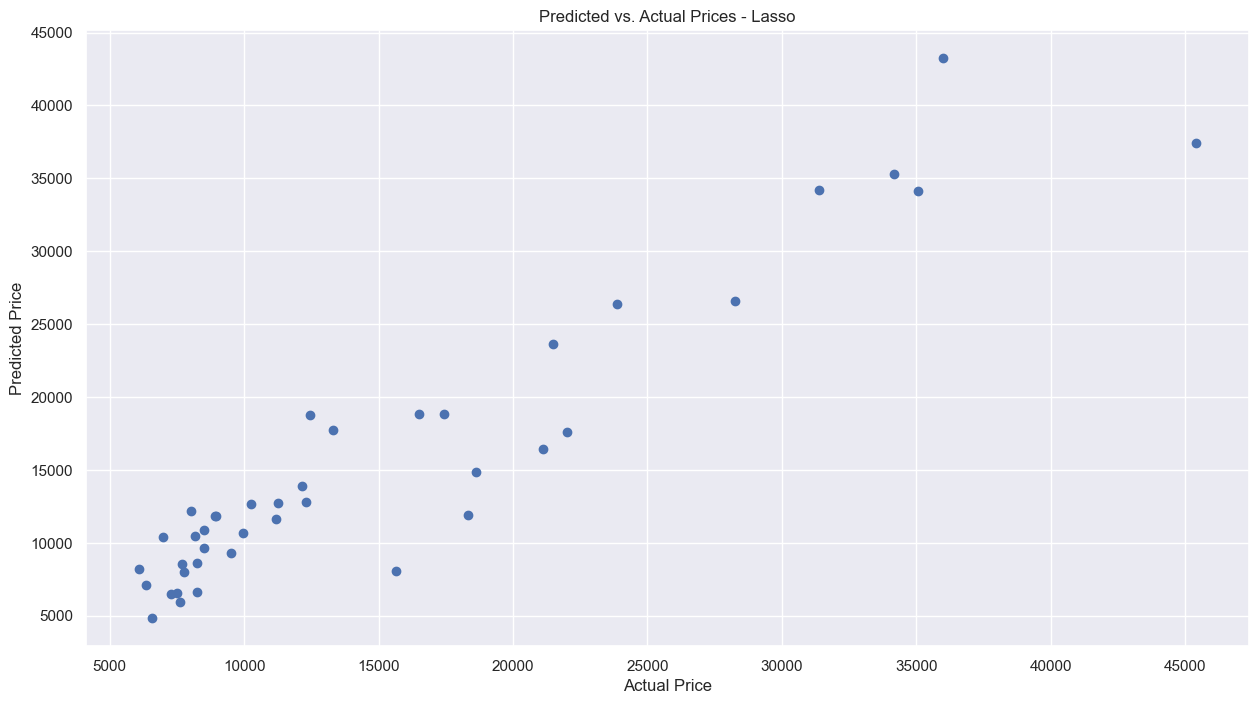

Best Model:Lasso(alpha=0.1)
-------------------------------

Training and evaluating Ridge
--- Ridge ---
Testing Data:
Mean Absolute Error: 2664.990718894918
Root Mean Squared Error: 3482.6114888567276


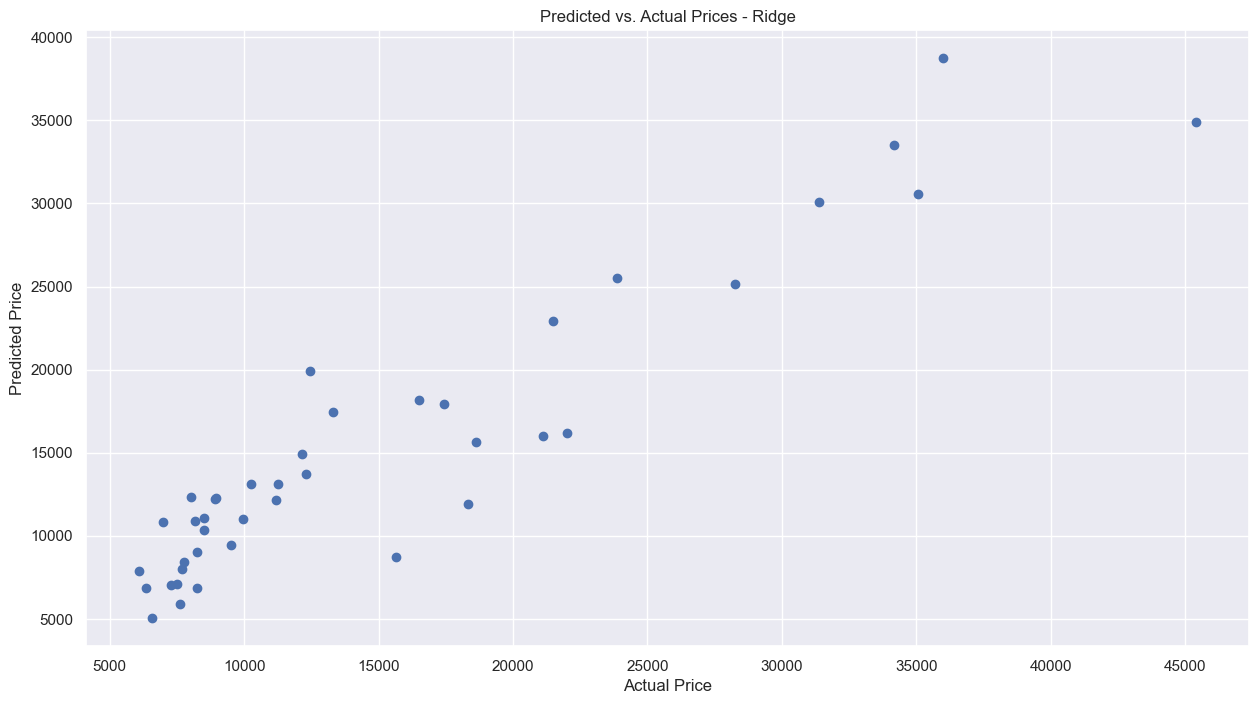

Best Model:Ridge(alpha=10)
-------------------------------

Training and evaluating SVM
--- SVM ---
Testing Data:
Mean Absolute Error: 4047.6585365853657
Root Mean Squared Error: 6107.708611894061


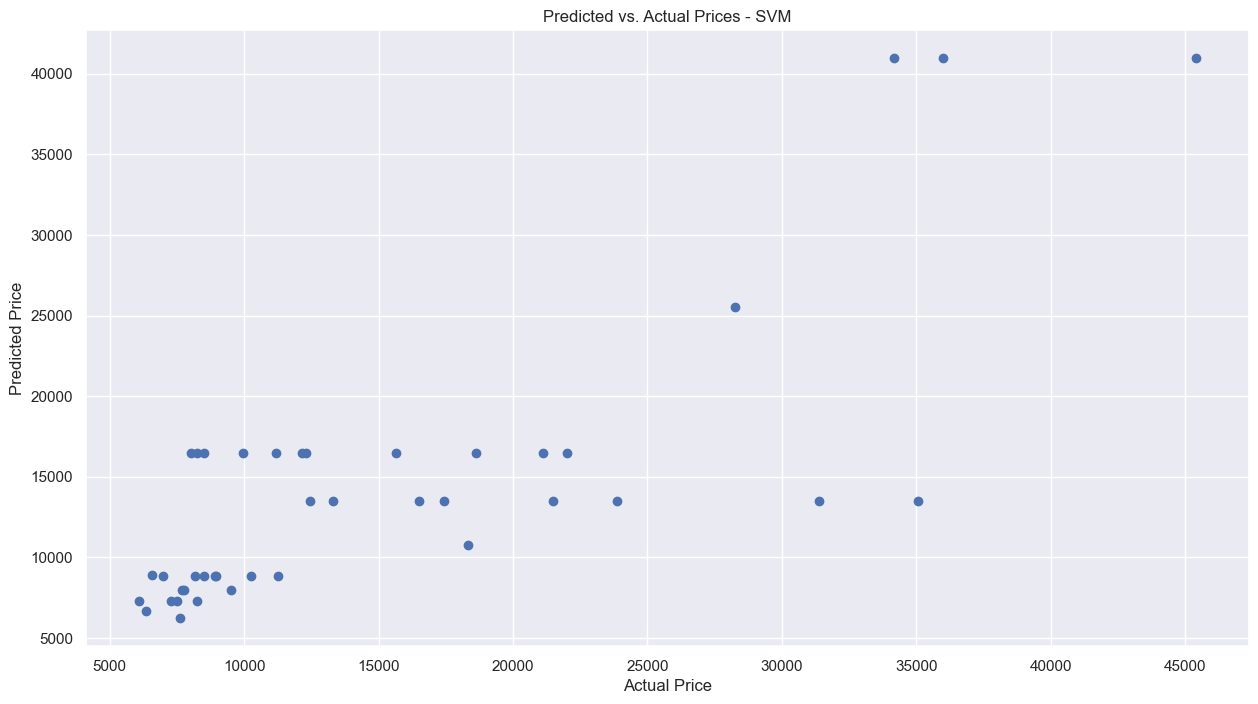

Best Model:SVC(C=1, kernel='poly')
-------------------------------

Training and evaluating Neural Network
--- Neural Network ---
Testing Data:
Mean Absolute Error: 3530.5853658536585
Root Mean Squared Error: 5507.24559103732


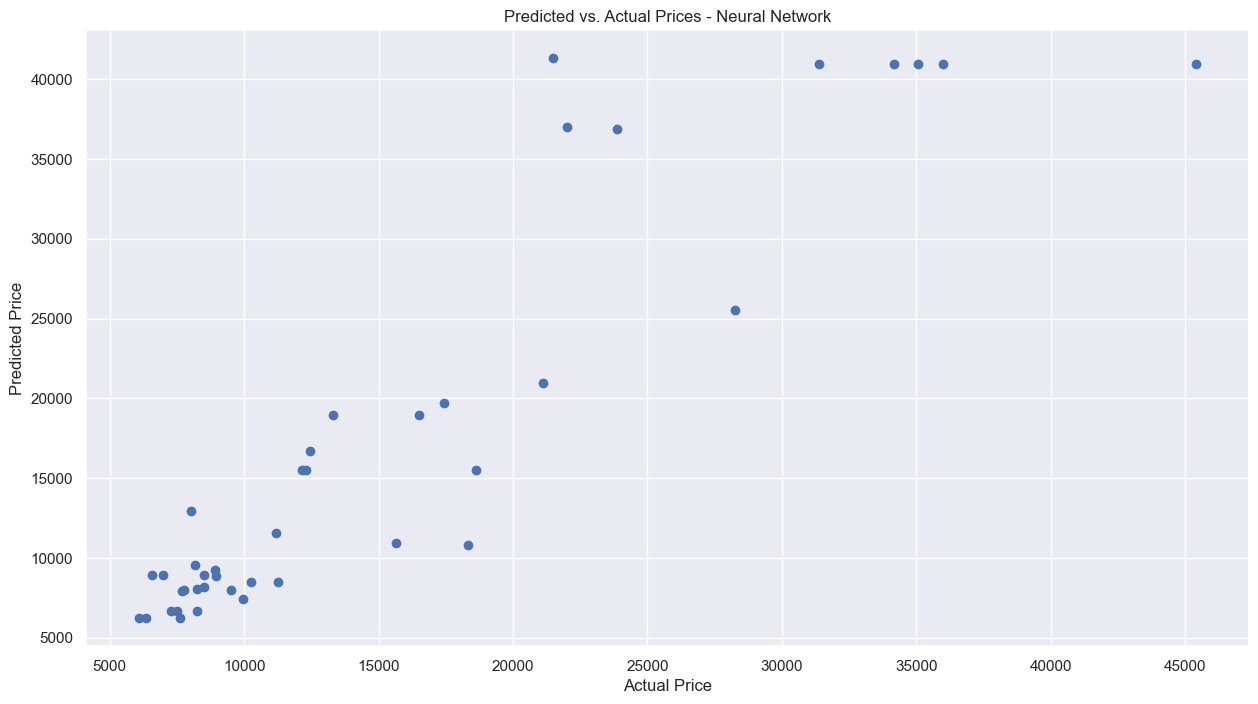

Best Model:MLPClassifier(hidden_layer_sizes=(50, 50))
-------------------------------



In [382]:
# Second Split on x_pca_combined - Combined Specfic Features using PCA 4 Features
X_train_pca, X_test_pca, y_train, y_test = train_test_split(x_pca_combined, y_clean, test_size=0.2, random_state=365)
# Train and evaluate models on each split
train_and_evaluate_models(X_train_pca, X_test_pca, y_train, y_test)

Training and evaluating Linear Regression
--- Linear Regression ---
Testing Data:
Mean Absolute Error: 2543.977891850554
Root Mean Squared Error: 3543.7610175686204


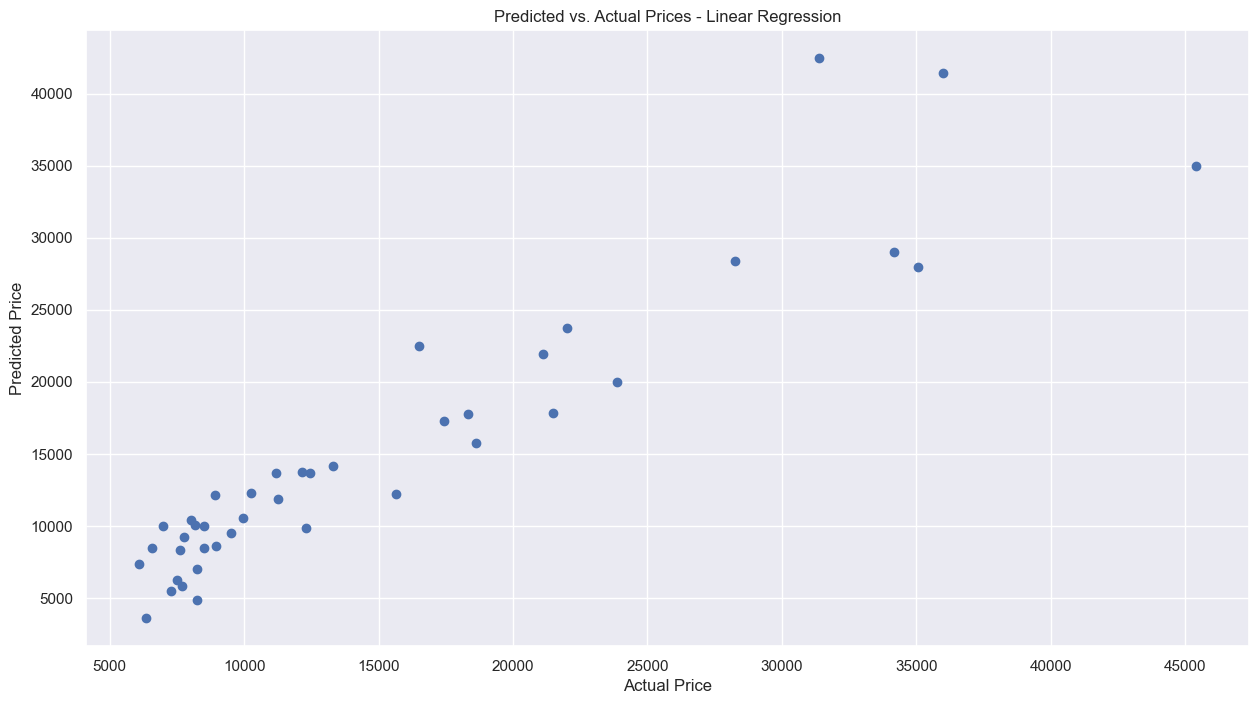

Best Model:LinearRegression()
-------------------------------

Training and evaluating Decision Tree
--- Decision Tree ---
Testing Data:
Mean Absolute Error: 5605.780487804878
Root Mean Squared Error: 9368.127736782997


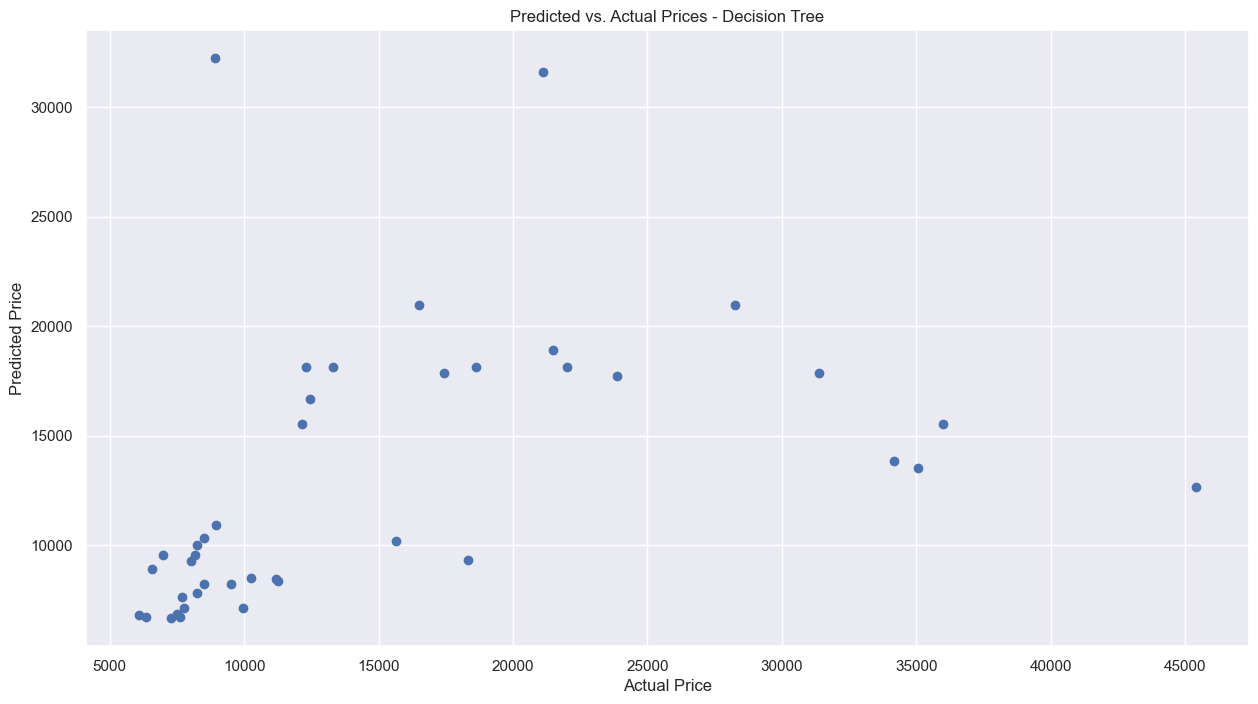

Best Model:DecisionTreeClassifier(criterion='entropy', max_depth=10)
-------------------------------

Training and evaluating Random Forest
--- Random Forest ---
Testing Data:
Mean Absolute Error: 4879.780487804878
Root Mean Squared Error: 8501.842255164896


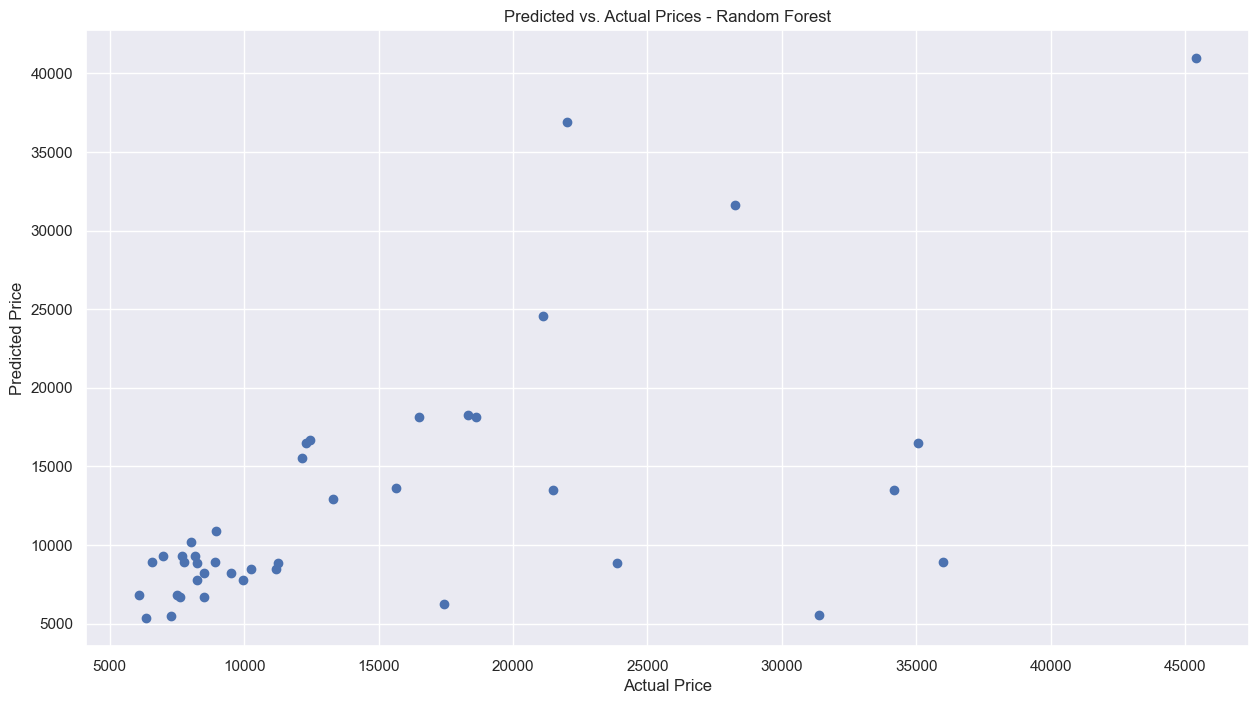

Best Model:RandomForestClassifier(min_samples_leaf=10)
-------------------------------

Training and evaluating Gradient Boosting
--- Gradient Boosting ---
Testing Data:
Mean Absolute Error: 2127.9718592327645
Root Mean Squared Error: 3081.8631824047293


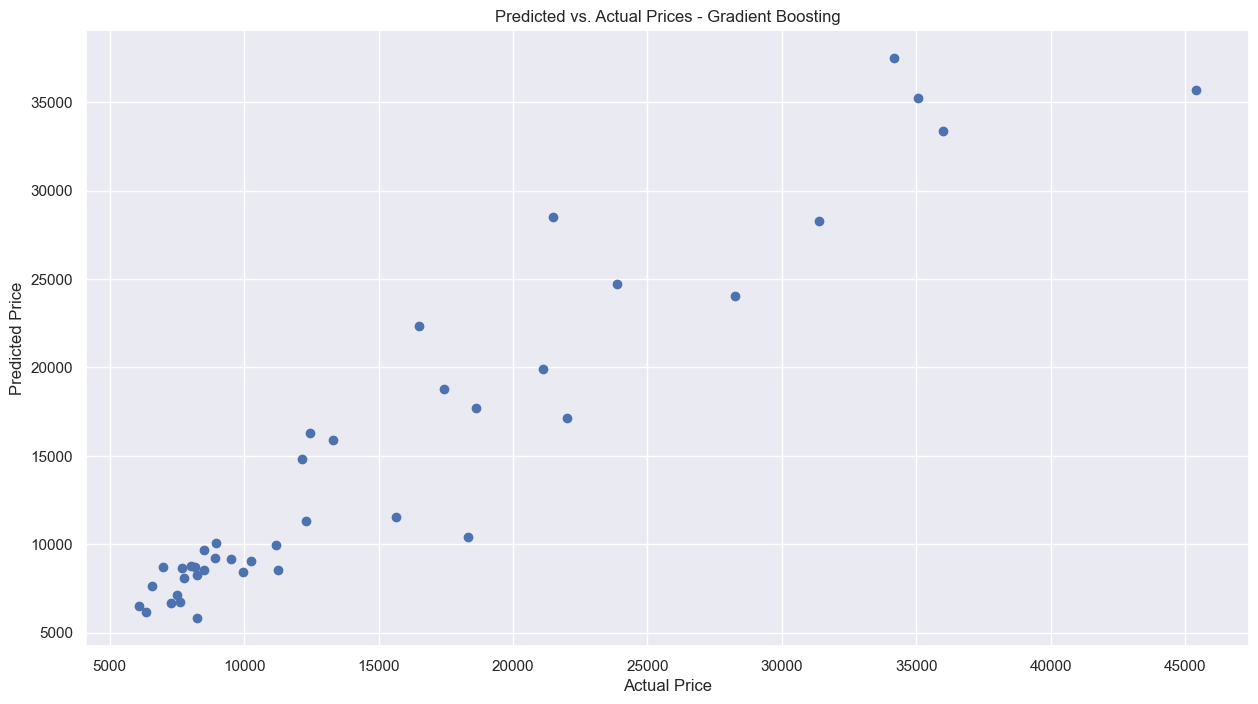

Best Model:GradientBoostingRegressor()
-------------------------------

Training and evaluating XGBoost
--- XGBoost ---
Testing Data:
Mean Absolute Error: 2062.2365424923782
Root Mean Squared Error: 3393.3995591046623


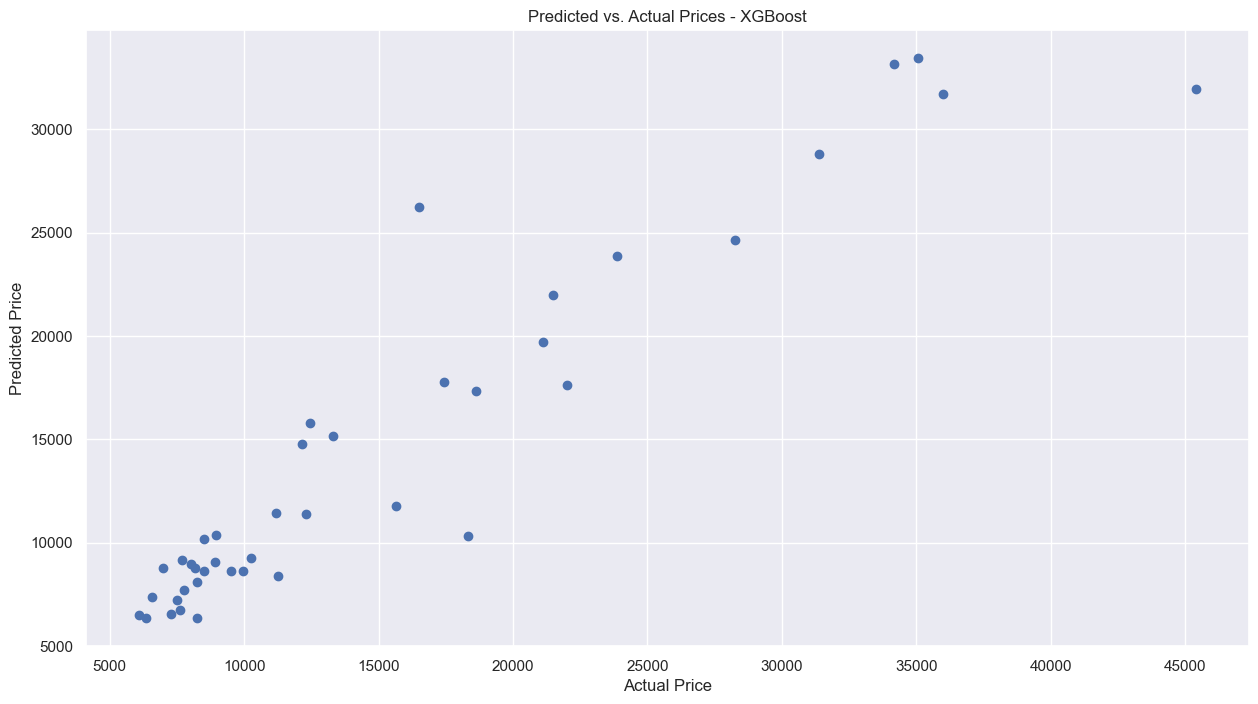

Best Model:XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)
-------------------------------

Training and evaluating Lasso
--- Lasso ---
Testing Data:
Mean Absolute Error: 2433.647581311393
Root Mean Squared Error: 3300.581060290293


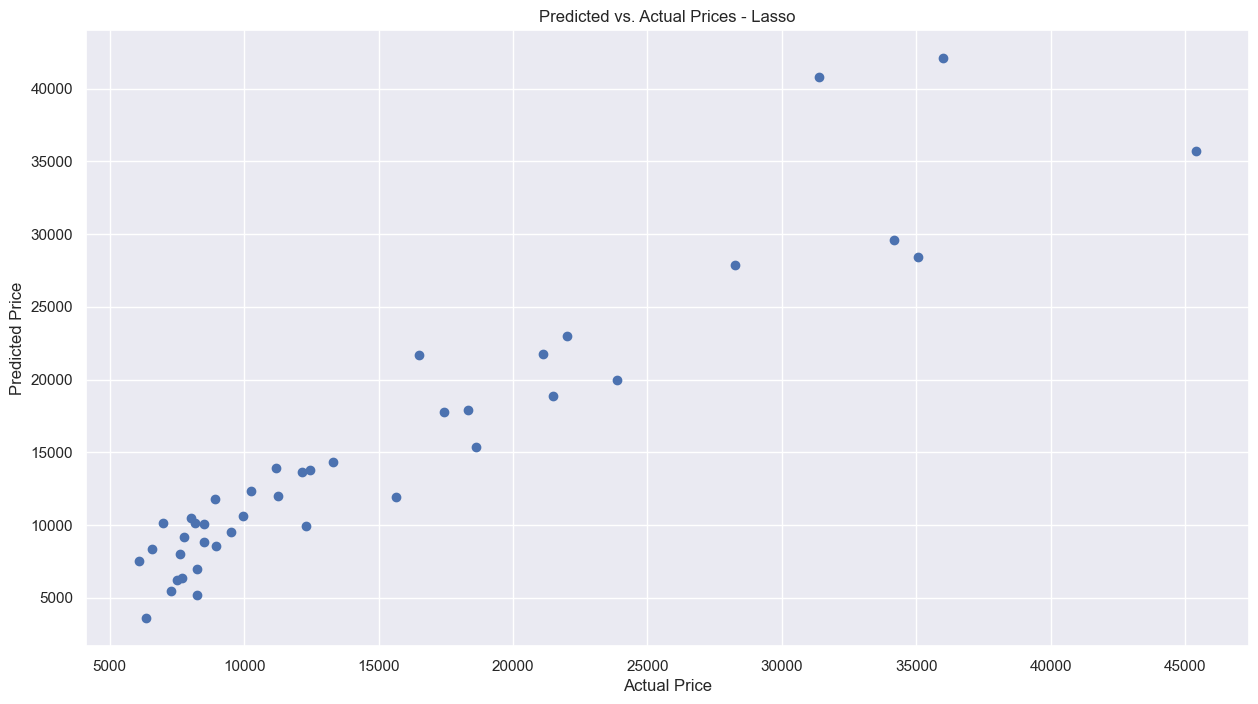

Best Model:Lasso(alpha=10)
-------------------------------

Training and evaluating Ridge
--- Ridge ---
Testing Data:
Mean Absolute Error: 2303.1869362619677
Root Mean Squared Error: 3124.0045855092717


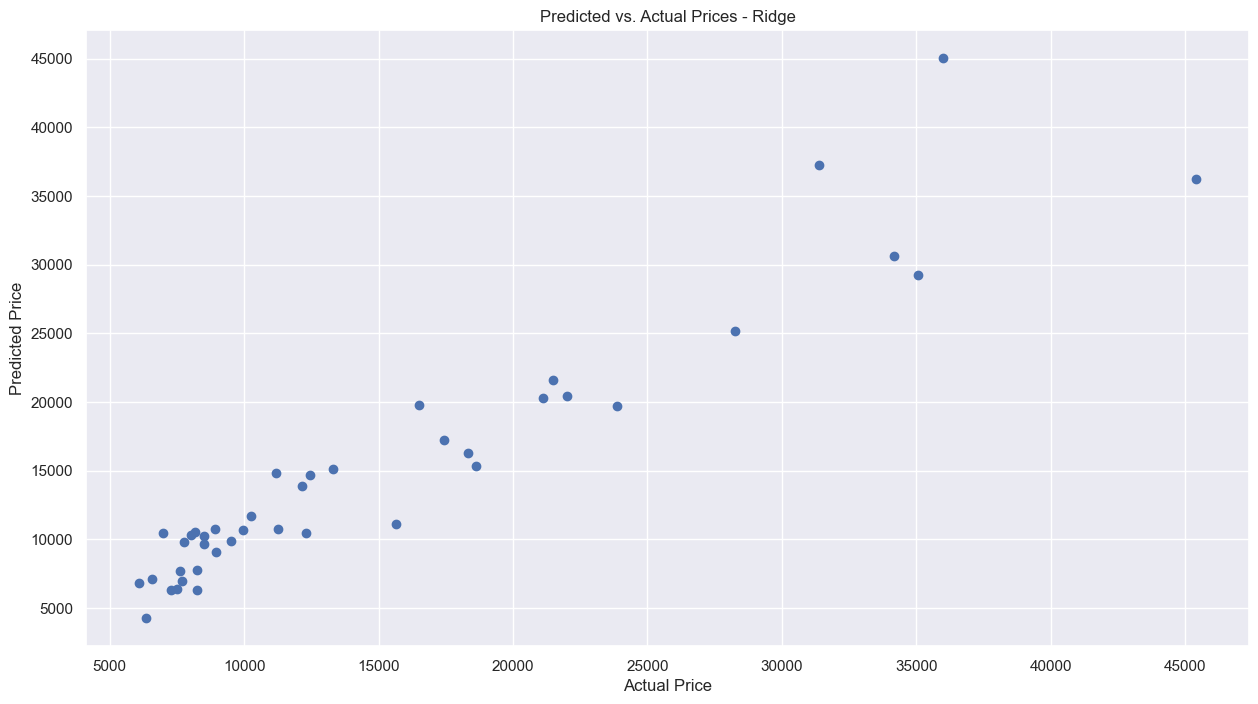

Best Model:Ridge(alpha=10)
-------------------------------

Training and evaluating SVM
--- SVM ---
Testing Data:
Mean Absolute Error: 4608.585365853659
Root Mean Squared Error: 6857.044357233893


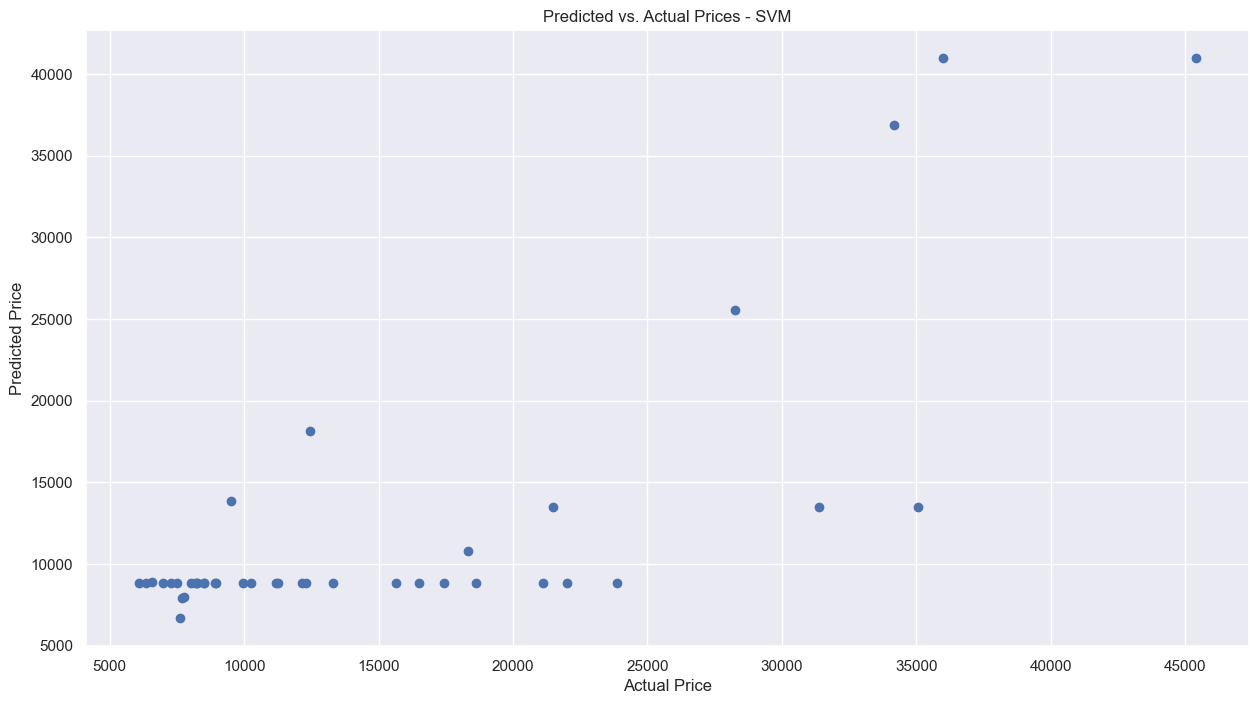

Best Model:SVC(C=1, kernel='poly')
-------------------------------

Training and evaluating Neural Network
--- Neural Network ---
Testing Data:
Mean Absolute Error: 3646.317073170732
Root Mean Squared Error: 5937.942800946897


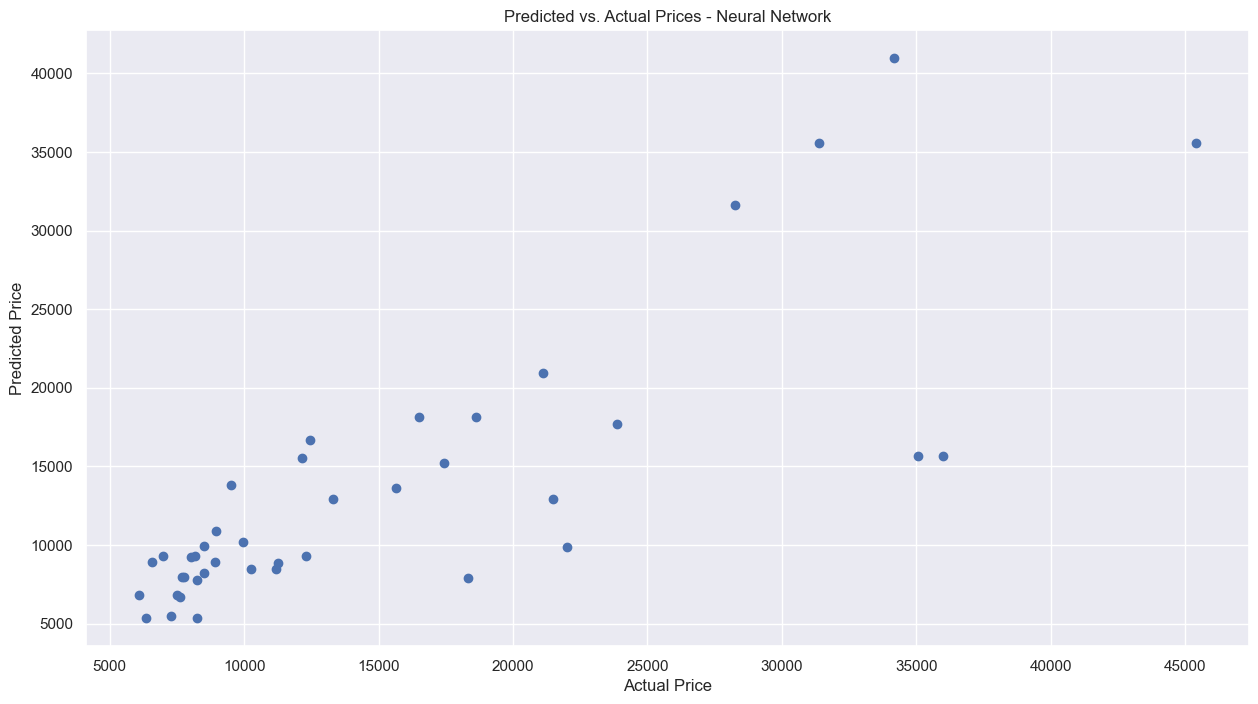

Best Model:MLPClassifier(hidden_layer_sizes=(50, 50))
-------------------------------



In [383]:
# Third Split on x_reduced - Combining All Features using PCA 30 Features
X_train_red, X_test_red, y_train, y_test = train_test_split(x_reduced_df, y_clean, test_size=0.2, random_state=365)
# Train and evaluate models on each split
train_and_evaluate_models(X_train_red, X_test_red, y_train, y_test)

In [388]:
# Create a dictionary to store the results
results = {
    'Split': [],
    'Algorithm': [],
    'MAE': [],
    'RMSE': [],
    'Best Model': []
}

# Original Split Results
results['Split'].extend(['Original'] * 9)
results['Algorithm'].extend([
    'Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 
    'XGBoost', 'Lasso', 'Ridge', 'SVM', 'Neural Network'
])
results['MAE'].extend([
    1593806629650492.5, 3293.19, 3311.48, 1799.34,
    1938.49, 2142.48, 2108.19, 4381.63,
    3597.58
])
results['RMSE'].extend([
    5799304204842690.0, 5760.48, 5948.47, 2485.61,
    2748.61, 3365.60, 3081.05, 6504.51,
    5638.28
])
results['Best Model'].extend([
    'LinearRegression()', 'DecisionTreeClassifier(criterion=\'entropy\')', 
    'RandomForestClassifier(max_depth=5, min_samples_leaf=5, n_estimators=200)',
    'GradientBoostingRegressor(max_depth=7)', 'XGBRegressor(learning_rate=0.1, max_depth=3, n_estimators=100)',
    'Lasso(alpha=10)', 'Ridge(alpha=1)', 'SVC(C=1, kernel=\'poly\')', 
    'MLPClassifier(hidden_layer_sizes=(50, 50))'
])

# PCA Combined Split Results
results['Split'].extend(['PCA Combined'] * 9)
results['Algorithm'].extend([
    'Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 
    'XGBoost', 'Lasso', 'Ridge', 'SVM', 'Neural Network'
])
results['MAE'].extend([
    2581.09, 2981.26, 2489.70, 2247.03,
    2305.00, 2581.15, 2664.99, 4047.65,
    3530.58
])
results['RMSE'].extend([
    3310.10, 5035.06, 3831.94, 3398.42,
    3628.28, 3310.15, 3482.61, 6107.70,
    5507.24
])
results['Best Model'].extend([
    'LinearRegression()', 'DecisionTreeClassifier(criterion=\'entropy\', max_depth=10)', 
    'RandomForestClassifier()', 'GradientBoostingRegressor(n_estimators=200)', 
    'XGBRegressor(learning_rate=0.1, max_depth=7, n_estimators=100)', 'Lasso(alpha=0.1)', 
    'Ridge(alpha=10)', 'SVC(C=1, kernel=\'poly\')', 'MLPClassifier(hidden_layer_sizes=(50, 50))'
])

# PCA Reduced Split Results
results['Split'].extend(['__PCA Reduced'] * 9)
results['Algorithm'].extend([
    'Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 
    'XGBoost', 'Lasso', 'Ridge', 'SVM', 'Neural Network'
])
results['MAE'].extend([
    2543.97, 5605.78, 4879.78, 2127.97,
    2062.23, 2433.64, 2303.18, 4608.58,
    3646.31
])
results['RMSE'].extend([
    3543.76, 9368.12, 8501.84, 3081.86,
    3393.39, 3300.58, 3124.00, 6857.04,
    5937.94
])
results['Best Model'].extend([
    'LinearRegression()', 'DecisionTreeClassifier(criterion=\'entropy\', max_depth=10)', 
    'RandomForestClassifier(min_samples_leaf=10)', 'GradientBoostingRegressor()', 
    'XGBRegressor(learning_rate=0.1, max_depth=3, n_estimators=100)', 'Lasso(alpha=10)', 
    'Ridge(alpha=10)', 'SVC(C=1, kernel=\'poly\')', 'MLPClassifier(hidden_layer_sizes=(50, 50))'
])

# Create a DataFrame
results_df = pd.DataFrame(results)
pd.options.display.float_format = '{:.2f}'.format
# Display the DataFrame
results_df

Split          Algorithm                 MAE                RMSE  \
0        Original  Linear Regression 1593806629650492.50 5799304204842690.00   
1        Original      Decision Tree             3293.19             5760.48   
2        Original      Random Forest             3311.48             5948.47   
3        Original  Gradient Boosting             1799.34             2485.61   
4        Original            XGBoost             1938.49             2748.61   
5        Original              Lasso             2142.48             3365.60   
6        Original              Ridge             2108.19             3081.05   
7        Original                SVM             4381.63             6504.51   
8        Original     Neural Network             3597.58             5638.28   
9    PCA Combined  Linear Regression             2581.09             3310.10   
10   PCA Combined      Decision Tree             2981.26             5035.06   
11   PCA Combined      Random Forest             2489.70             3831.94   
12   PCA Combined  Gradient Boosting             2247.03             3398.42   
13   PCA Combined            XGBoost             2305.00             3628.28   
14   PCA Combined              Lasso             2581.15             3310.15   
15   PCA Combined              Ridge             2664.99             3482.61   
16   PCA Combined                SVM             4047.65             6107.70   
17   PCA Combined     Neural Network             3530.58             5507.24   
18  __PCA Reduced  Linear Regression             2543.97             3543.76   
19  __PCA Reduced      Decision Tree             5605.78             9368.12   
20  __PCA Reduced      Random Forest             4879.78             8501.84   
21  __PCA Reduced  Gradient Boosting             2127.97             3081.86   
22  __PCA Reduced            XGBoost             2062.23             3393.39   
23  __PCA Reduced              Lasso             2433.64             3300.58   
24  __PCA Reduced              Ridge             2303.18             3124.00   
25  __PCA Reduced                SVM             4608.58             6857.04   
26  __PCA Reduced     Neural Network             3646.31             5937.94   

                                           Best Model  
0                                  LinearRegression()  
1         DecisionTreeClassifier(criterion='entropy')  
2   RandomForestClassifier(max_depth=5, min_sample...  
3              GradientBoostingRegressor(max_depth=7)  
4   XGBRegressor(learning_rate=0.1, max_depth=3, n...  
5                                     Lasso(alpha=10)  
6                                      Ridge(alpha=1)  
7                             SVC(C=1, kernel='poly')  
8          MLPClassifier(hidden_layer_sizes=(50, 50))  
9                                  LinearRegression()  
10  DecisionTreeClassifier(criterion='entropy', ma...  
11                           RandomForestClassifier()  
12        GradientBoostingRegressor(n_estimators=200)  
13  XGBRegressor(learning_rate=0.1, max_depth=7, n...  
14                                   Lasso(alpha=0.1)  
15                                    Ridge(alpha=10)  
16                            SVC(C=1, kernel='poly')  
17         MLPClassifier(hidden_layer_sizes=(50, 50))  
18                                 LinearRegression()  
19  DecisionTreeClassifier(criterion='entropy', ma...  
20        RandomForestClassifier(min_samples_leaf=10)  
21                        GradientBoostingRegressor()  
22  XGBRegressor(learning_rate=0.1, max_depth=3, n...  
23                                    Lasso(alpha=10)  
24                                    Ridge(alpha=10)  
25                            SVC(C=1, kernel='poly')  
26         MLPClassifier(hidden_layer_sizes=(50, 50))

In [408]:
sort = results_df.sort_values(['Split', 'MAE', 'RMSE'])
sort

Split          Algorithm                 MAE                RMSE  \
3        Original  Gradient Boosting             1799.34             2485.61   
4        Original            XGBoost             1938.49             2748.61   
6        Original              Ridge             2108.19             3081.05   
5        Original              Lasso             2142.48             3365.60   
1        Original      Decision Tree             3293.19             5760.48   
2        Original      Random Forest             3311.48             5948.47   
8        Original     Neural Network             3597.58             5638.28   
7        Original                SVM             4381.63             6504.51   
0        Original  Linear Regression 1593806629650492.50 5799304204842690.00   
12   PCA Combined  Gradient Boosting             2247.03             3398.42   
13   PCA Combined            XGBoost             2305.00             3628.28   
11   PCA Combined      Random Forest             2489.70             3831.94   
9    PCA Combined  Linear Regression             2581.09             3310.10   
14   PCA Combined              Lasso             2581.15             3310.15   
15   PCA Combined              Ridge             2664.99             3482.61   
10   PCA Combined      Decision Tree             2981.26             5035.06   
17   PCA Combined     Neural Network             3530.58             5507.24   
16   PCA Combined                SVM             4047.65             6107.70   
22  __PCA Reduced            XGBoost             2062.23             3393.39   
21  __PCA Reduced  Gradient Boosting             2127.97             3081.86   
24  __PCA Reduced              Ridge             2303.18             3124.00   
23  __PCA Reduced              Lasso             2433.64             3300.58   
18  __PCA Reduced  Linear Regression             2543.97             3543.76   
26  __PCA Reduced     Neural Network             3646.31             5937.94   
25  __PCA Reduced                SVM             4608.58             6857.04   
20  __PCA Reduced      Random Forest             4879.78             8501.84   
19  __PCA Reduced      Decision Tree             5605.78             9368.12   

                                           Best Model  
3              GradientBoostingRegressor(max_depth=7)  
4   XGBRegressor(learning_rate=0.1, max_depth=3, n...  
6                                      Ridge(alpha=1)  
5                                     Lasso(alpha=10)  
1         DecisionTreeClassifier(criterion='entropy')  
2   RandomForestClassifier(max_depth=5, min_sample...  
8          MLPClassifier(hidden_layer_sizes=(50, 50))  
7                             SVC(C=1, kernel='poly')  
0                                  LinearRegression()  
12        GradientBoostingRegressor(n_estimators=200)  
13  XGBRegressor(learning_rate=0.1, max_depth=7, n...  
11                           RandomForestClassifier()  
9                                  LinearRegression()  
14                                   Lasso(alpha=0.1)  
15                                    Ridge(alpha=10)  
10  DecisionTreeClassifier(criterion='entropy', ma...  
17         MLPClassifier(hidden_layer_sizes=(50, 50))  
16                            SVC(C=1, kernel='poly')  
22  XGBRegressor(learning_rate=0.1, max_depth=3, n...  
21                        GradientBoostingRegressor()  
24                                    Ridge(alpha=10)  
23                                    Lasso(alpha=10)  
18                                 LinearRegression()  
26         MLPClassifier(hidden_layer_sizes=(50, 50))  
25                            SVC(C=1, kernel='poly')  
20        RandomForestClassifier(min_samples_leaf=10)  
19  DecisionTreeClassifier(criterion='entropy', ma...

- We notice that for each split Gradient Boosting performed the best expect for 'PCA Reduced' XGBoost performed better

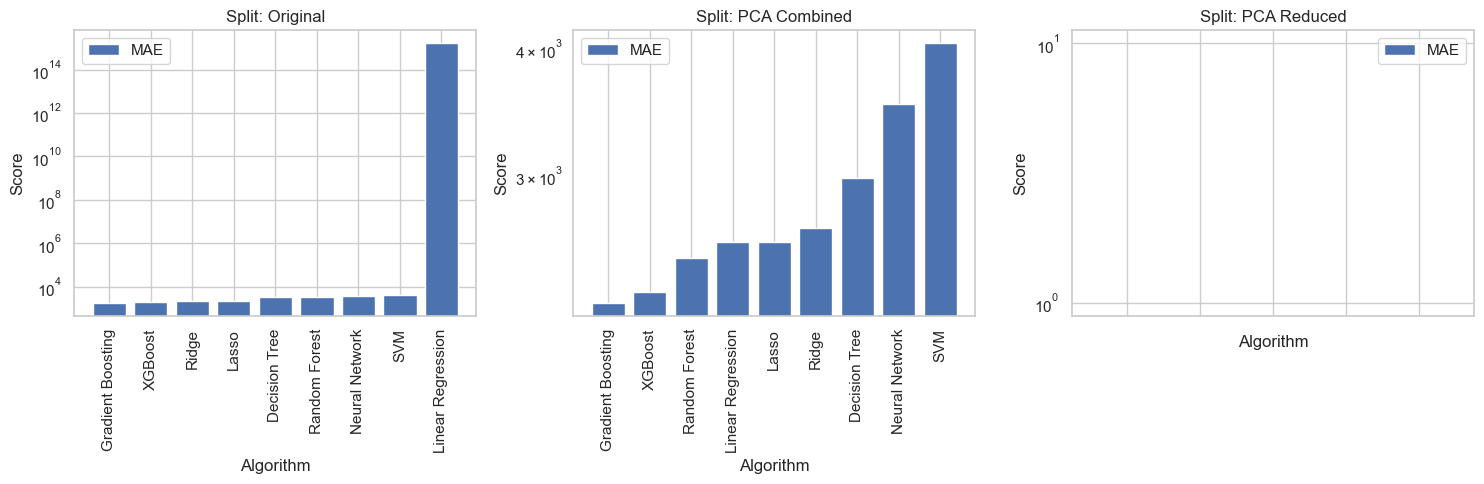

In [404]:
# Sort the DataFrame by MAE in ascending order for each split
sorted_results_df = results_df.sort_values(['Split', 'MAE'])

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Define the splits
splits = ['Original', 'PCA Combined', 'PCA Reduced']

# Loop through the splits and create a plot for each
for i, split in enumerate(splits):
    split_df = sorted_results_df[sorted_results_df['Split'] == split]
    
    # Plot MAE scores on a logarithmic scale
    axes[i].bar(split_df['Algorithm'], split_df['MAE'], color='b', label='MAE')

    
    # Set y-axis to logarithmic scale
    axes[i].set_yscale('log')
    
    # Set plot title and labels
    axes[i].set_title(f'Split: {split}')
    axes[i].set_xticklabels(split_df['Algorithm'], rotation=90)
    axes[i].set_xlabel('Algorithm')
    axes[i].set_ylabel('Score')
    axes[i].legend()

# Adjust layout and show plots
plt.tight_layout()
plt.show()

## Gradient Boosting is the best Machine Learning Algorithm that fits the dataset for MAE

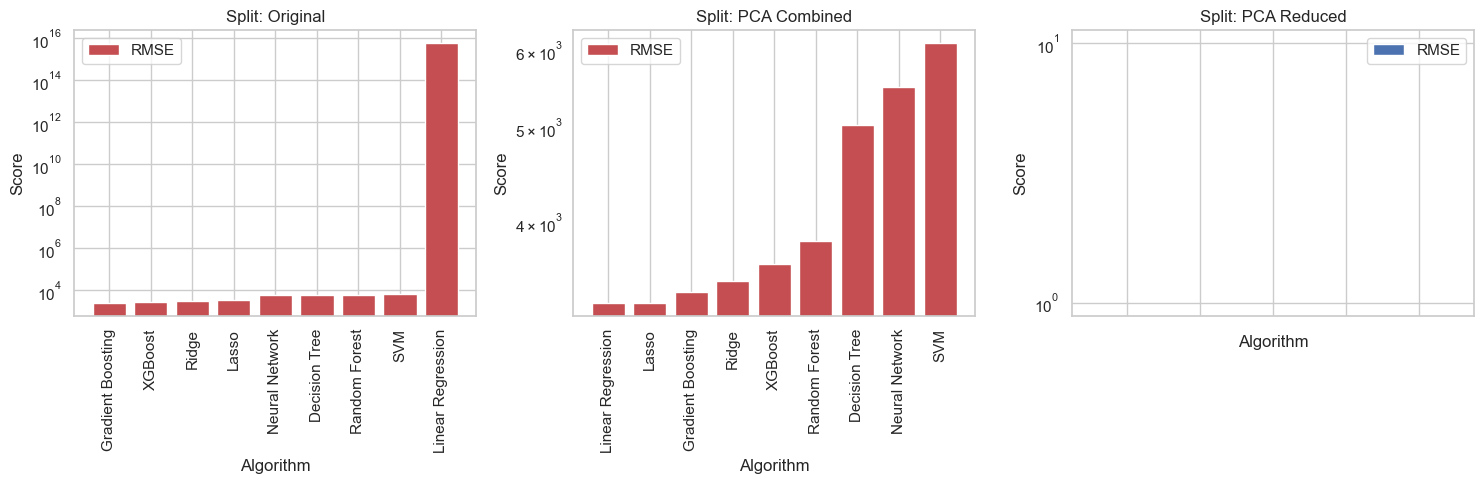

In [415]:
# Sort the DataFrame by MAE in ascending order for each split
sorted_results_df = results_df.sort_values(['Split', 'RMSE'])

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Define the splits
splits = ['Original', 'PCA Combined', 'PCA Reduced']

# Loop through the splits and create a plot for each
for i, split in enumerate(splits):
    split_df = sorted_results_df[sorted_results_df['Split'] == split]
    
    # Plot MAE scores on a logarithmic scale
    axes[i].bar(split_df['Algorithm'], split_df['RMSE'], color='r', label='RMSE')

    
    # Set y-axis to logarithmic scale
    axes[i].set_yscale('log')
    
    # Set plot title and labels
    axes[i].set_title(f'Split: {split}')
    axes[i].set_xticklabels(split_df['Algorithm'], rotation=90)
    axes[i].set_xlabel('Algorithm')
    axes[i].set_ylabel('Score')
    axes[i].legend()

# Adjust layout and show plots
plt.tight_layout()
plt.show()

## Gradient Boosting is the best ML model that fits the dataset for RMSE with original DF, but for PCA Combined Linear Regression performed more than Gradient Boosting